# Исследование объявлений о продаже квартир

**Описание проекта**

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Иструменты**

- python
- pandas
- matplotlib

**Описание данных**

- `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)
- `balcony` — число балконов
- `ceiling_height` — высота потолков (м)
- `cityCenters_nearest` — расстояние до центра города (м)
- `days_exposition` — сколько дней было размещено объявление (от публикации до снятия)
- `first_day_exposition` — дата публикации
- `floor` — этаж
- `floors_total` — всего этажей в доме
- `is_apartment` — апартаменты (булев тип)
- `kitchen_area` — площадь кухни в квадратных метрах (м²)
- `last_price` — цена на момент снятия с публикации
- `living_area` — жилая площадь в квадратных метрах (м²)
- `locality_name` — название населённого пункта
- `open_plan` — свободная планировка (булев тип)
- `parks_around3000` — число парков в радиусе 3 км
- `parks_nearest` — расстояние до ближайшего парка (м)
- `ponds_around3000` — число водоёмов в радиусе 3 км
- `ponds_nearest` — расстояние до ближайшего водоёма (м)
- `rooms` — число комнат
- `studio` — квартира-студия (булев тип)
- `total_area` — общая площадь квартиры в квадратных метрах (м²)
- `total_images` — число фотографий квартиры в объявлении



### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd

try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t') #Откроем данные, применим параметр sep, что разделить колонки

In [2]:
%config InlineBackend.figure_format = 'retina'

In [3]:
import matplotlib.pyplot as plt 

In [4]:
import numpy as np

In [5]:
data.info() #Выведем обущю информацию о данных. Можно заметить, что в колонках имеются пропуски.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [6]:
data.head() #Посмотрим первые строки датафрейма. Здесь можем увидеть, что пропуски есть в различных столбцах.

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


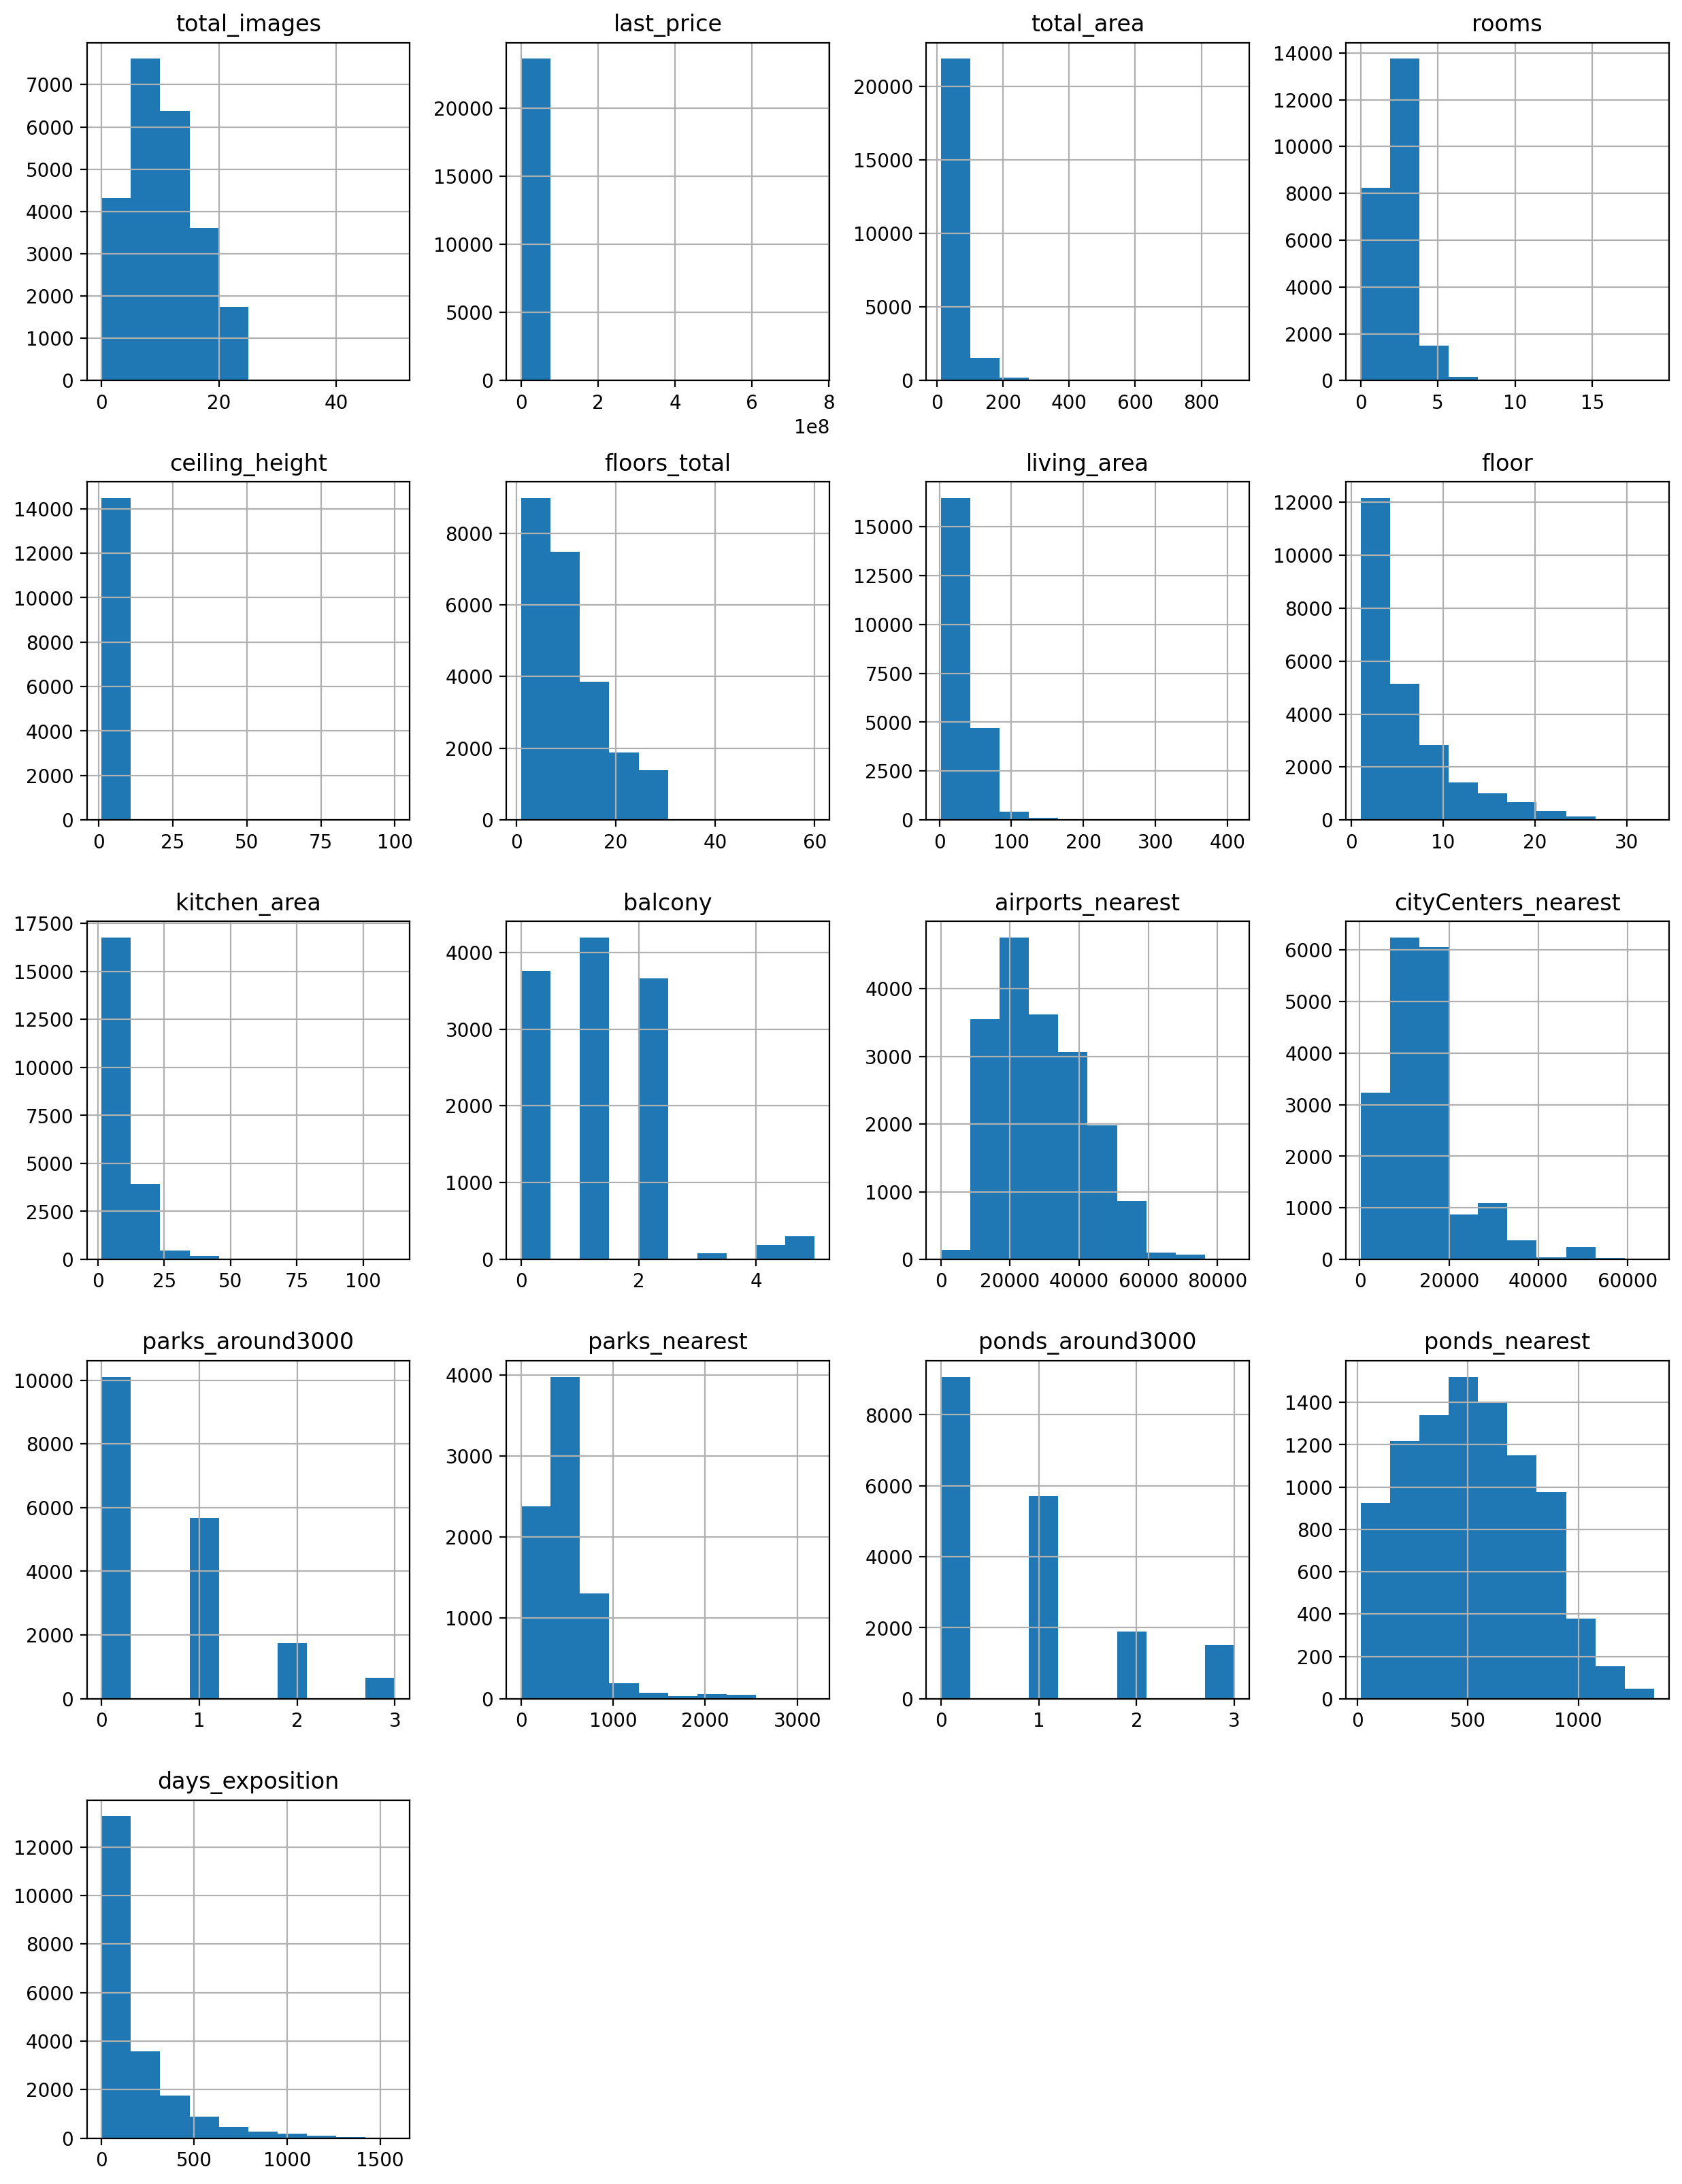

In [7]:
data.hist(figsize=(15, 20));

**Вывод:** По общей информации и данным гистограммам можно заметить, что некоторые данные имеют ненормальное распределение, что означает, что присутствуют выбросы.Далее в предобработке данных мы их устраним.</div>

### Предобработка данных

 <b>1.Проведем предобработку столбцов по порядку.</b>

In [8]:
data.isna().sum() #По выведенным данным, можем увидеть, что пропуски имеются во многих слотбцах. Далее рассмотрим их по отдельности 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Начнем предобработку со столбца `ceiling_height`

In [9]:
data['ceiling_height'].unique() #Выведем уникальные значения столбца

array([  2.7 ,    nan,   3.03,   2.5 ,   2.67,   2.56,   3.05,   2.75,
         2.6 ,   2.9 ,   2.8 ,   2.55,   3.  ,   2.65,   3.2 ,   2.61,
         3.25,   3.45,   2.77,   2.85,   2.64,   2.57,   4.15,   3.5 ,
         3.3 ,   2.71,   4.  ,   2.47,   2.73,   2.84,   3.1 ,   2.34,
         3.4 ,   3.06,   2.72,   2.54,   2.51,   2.78,   2.76,  25.  ,
         2.58,   3.7 ,   2.52,   5.2 ,   2.87,   2.66,   2.59,   2.  ,
         2.45,   3.6 ,   2.92,   3.11,   3.13,   3.8 ,   3.15,   3.55,
         3.16,   3.62,   3.12,   2.53,   2.74,   2.96,   2.46,   5.3 ,
         5.  ,   2.79,   2.95,   4.06,   2.94,   3.82,   3.54,   3.53,
         2.83,   4.7 ,   2.4 ,   3.38,   3.01,   5.6 ,   3.65,   3.9 ,
         3.18,   3.35,   2.3 ,   3.57,   2.48,   2.62,   2.82,   3.98,
         2.63,   3.83,   3.52,   3.95,   3.75,   2.88,   3.67,   3.87,
         3.66,   3.85,   3.86,   4.19,   3.24,   4.8 ,   4.5 ,   4.2 ,
         3.36,  32.  ,   3.08,   3.68,   3.07,   3.37,   3.09,   8.  ,
      

Можно заметить, что имеются аномально высокие значения. Скорее всего в этих значениях просто кол-во знаков перед запятой неверно.Предположим, что максимально возможная высота потолка 11 метров, приведем аномальные значения к нормальным.  

In [11]:
data['ceiling_height']=data['ceiling_height'].apply(lambda x: x/10 if x>11 else x)

In [12]:
data['ceiling_height'].unique() # Проверим, аномальные значения исчезли

array([ 2.7 ,   nan,  3.03,  2.5 ,  2.67,  2.56,  3.05,  2.75,  2.6 ,
        2.9 ,  2.8 ,  2.55,  3.  ,  2.65,  3.2 ,  2.61,  3.25,  3.45,
        2.77,  2.85,  2.64,  2.57,  4.15,  3.5 ,  3.3 ,  2.71,  4.  ,
        2.47,  2.73,  2.84,  3.1 ,  2.34,  3.4 ,  3.06,  2.72,  2.54,
        2.51,  2.78,  2.76,  2.58,  3.7 ,  2.52,  5.2 ,  2.87,  2.66,
        2.59,  2.  ,  2.45,  3.6 ,  2.92,  3.11,  3.13,  3.8 ,  3.15,
        3.55,  3.16,  3.62,  3.12,  2.53,  2.74,  2.96,  2.46,  5.3 ,
        5.  ,  2.79,  2.95,  4.06,  2.94,  3.82,  3.54,  3.53,  2.83,
        4.7 ,  2.4 ,  3.38,  3.01,  5.6 ,  3.65,  3.9 ,  3.18,  3.35,
        2.3 ,  3.57,  2.48,  2.62,  2.82,  3.98,  2.63,  3.83,  3.52,
        3.95,  3.75,  2.88,  3.67,  3.87,  3.66,  3.85,  3.86,  4.19,
        3.24,  4.8 ,  4.5 ,  4.2 ,  3.36,  3.08,  3.68,  3.07,  3.37,
        3.09,  8.  ,  3.26,  3.34,  2.81,  3.44,  2.97,  3.14,  4.37,
        2.68,  3.22,  3.27,  4.1 ,  2.93,  3.46,  3.47,  3.33,  3.63,
        3.32,  1.2 ,

In [13]:
for t in data['locality_name'].unique():
    data.loc[(data['locality_name']==t)&(data['ceiling_height'].isna()),'ceiling_height']=\
    data.loc[(data['locality_name'] == t), 'ceiling_height'].mean()

In [14]:
data['ceiling_height'].isna().sum() 

156

Обработаем столбец `balcony`

In [15]:
data['balcony'].isna().sum() #Проверяем кол-во пропусков в столбце 'balcony'

11519

In [16]:
data['balcony']=data['balcony'].fillna(0) # Так как значения в столбце категориальные и подразумевают либо наличие, либо отсутствие балкона, можем заменить пропуски на '0'

In [17]:
data['balcony'].isna().sum() # Проверим ичезли ли пропуски

0

Проверим столбец `is_apartment`

In [18]:
data['is_apartment'].isna().sum() # Найдем кол-во пропусков в столбце 'is_apartment' 

20924

In [19]:
data['is_apartment']=data['is_apartment'].fillna('False') 
# Так как значения в столбце 'is_apartment'- булевое значение т.е. определяют является ли объект квартирой, мы можем заменить пропуски на "False"

In [20]:
data['is_apartment'].isna().sum() #Проверяем заменились ли пропуски

0

Посмотрим на столбец `floors_total`

In [21]:
data['floors_total'].isna().sum() # Найдем кол-во пропусков в столбце 'floors_total' 

86

In [22]:
data.dropna(subset = ['floors_total'], inplace=True)

In [23]:
data['floors_total'].isna().sum() # Проверим остались ли пропуски

0

Следующие столбцы заменим на пустые значения или на 0 т.к. среднии значения или медиана не подойдут для замены пропусков

In [24]:
data['airports_nearest']=data['airports_nearest'].fillna('')

In [25]:
data['cityCenters_nearest']=data['cityCenters_nearest'].fillna(0)

In [26]:
data['parks_around3000']=data['parks_around3000'].fillna(0)

In [27]:
data['parks_nearest']=data['parks_nearest'].fillna('')

In [28]:
data['ponds_around3000']=data['ponds_around3000'].fillna(0)

In [29]:
data['ponds_nearest']=data['ponds_nearest'].fillna(0)

In [30]:
data['locality_name']=data['locality_name'].fillna('')

In [31]:
days_exposition_avg=data['days_exposition'].median()

In [32]:
data['days_exposition']=data['days_exposition'].fillna(days_exposition_avg)

Заменим значения в столбцах `living_area`и `kithen_area`

In [33]:
kitchen_rat=(data['kitchen_area']/data['total_area']).mean()

In [34]:
living_rat=(data['living_area']/data['total_area']).mean()

In [35]:
kitchen_median=data['total_area']*kitchen_rat

In [36]:
living_median=data['total_area']*living_rat

In [37]:
data['living_area']=data['living_area'].fillna(living_median)

In [38]:
data['kitchen_area']=data['kitchen_area'].fillna(kitchen_median)

In [39]:
data.isna().sum() # Проверим все ли пропуски заменились

total_images              0
last_price                0
total_area                0
first_day_exposition      0
rooms                     0
ceiling_height          154
floors_total              0
living_area               0
floor                     0
is_apartment              0
studio                    0
open_plan                 0
kitchen_area              0
balcony                   0
locality_name             0
airports_nearest          0
cityCenters_nearest       0
parks_around3000          0
parks_nearest             0
ponds_around3000          0
ponds_nearest             0
days_exposition           0
dtype: int64

**Вывод:** 
Так как в базе содержится два типа данных: добавленные пользователем и картографические, пропуски в данных могут быть обусловлены разными причинами. Например,  пропуски в данных о площади квартиры и кухни, этаж и кол-во балконов могут быть обусловлены случайной ошибкой (человеческим фактором).Другие же данные могут, такие как расстояния до центра города, аэропорта и ближайшего парка, а также кол-во парков и прудов рядом и дней размещения на сайте, могут быть обусловлены технической ошибкой, либо недостатком данных.

<b>2. Посмотрим на типы переменных в столбцах и изменим их,где это необходимо.</b>

In [40]:
data.info() # Выведем типы значений, которые есть сейчас

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23459 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest   

Данные в столбац, имеющих количественныце данные заменим методом `to_numeric`

In [41]:
data['balcony']= pd.to_numeric (data['balcony'],errors='coerce')

In [42]:
data['parks_around3000']= pd.to_numeric (data['parks_around3000'],errors='coerce')

In [43]:
data['parks_nearest']= pd.to_numeric (data['parks_around3000'],errors='coerce')

In [44]:
data['airports_nearest']= pd.to_numeric (data['parks_around3000'],errors='coerce')

In [45]:
data['days_exposition']= pd.to_numeric (data['days_exposition'],errors='coerce')

In [46]:
data['ponds_around3000']= pd.to_numeric (data['ponds_around3000'],errors='coerce')

In [47]:
data['living_area']=pd.to_numeric(data['living_area'],errors='coerce')

In [48]:
data['kitchen_area']=pd.to_numeric(data['kitchen_area'],errors='coerce')

In [49]:
data['floors_total']= pd.to_numeric (data['floors_total'],errors='coerce')

In [50]:
data['is_apartment']=data['is_apartment'].astype('bool') # В этом столбце можем заменить на булевое значение, т.к. логически подходит

In [51]:
data['first_day_exposition']=data['first_day_exposition'].astype(str) # Заменим на строковый тип

In [52]:
data.info() # Проверим, изменились ли типы данных

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23459 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          23613 non-null  bool   
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23613 non-null  object 
 15  airports_nearest   

**Вывод:** Тип данных в столбцах `balcony`,`parks_around3000`,`days_exposition`,`ponds_around3000`,`total_area`,`kitchen_area`,`living_area` изменим на числовой, т.к. тип 'object' не подходит для числовых значений в столбцах. Данные в столбце `is_apartment` переведем в булевое значение. Формат в столбце`first_day_exposition` изменим на 'str', в дальнейшем потребуется для вычислений.</div>

<b>3. Изучим уникальные значения в столбце `locality_name` </b>

In [53]:
data['locality_name'].nunique() #Найдем кол-во уникальных значений в столбце

365

In [141]:
data['locality_name'].unique() # Посмотрим на уникальные значения столбца

array(['Шушары', 'Санкт-Петербург', 'Янино-1', 'Парголово', 'Мурино',
       'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово', 'Коммунар',
       'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское', 'Выборг',
       'Кировск', 'Новое Девяткино', 'Металлострой', 'Лебяжье',
       'Сиверский', 'Молодцово', 'Кузьмоловский', 'Новая Ропша',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Торковичи',
       'Первомайское', 'Красное', 'Понтонный', 'Сясьстрой', 'Старая',
       'Павловск', 'Лесколово', 'Новый Свет', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Сосновый Бор', 'Кириши', 'Луга', 'Волосово',
       'Отрадное', 'Павлово', 'Оредеж', 'Копорье', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Стрельна', 'Лопухинка', 'Терволово',
       'Советский', 'Подпорожье', 'Петровское', 'Токсово', 'Сельцо',
       'Тосно', 'Вырица', 'Кипень', 'К

Создадим функцию, которая выявит неявные дубликаты и заменит их.

In [55]:
def replace_name(name):
    splited_name = name.split(' ')
    words_for_remove = {'село', 'поселок', 'посёлок', 'городского','типа','деревня','товарищество','садовое','городской','станции','некоммерческое','при','железнодорожной','коттеджный','садоводческое'}
    good_words=[]
    for word in splited_name:
        if word.lower() not in words_for_remove:
            good_words.append(word)
    return ' '.join(good_words)
        

In [56]:
data['locality_name']=data['locality_name'].apply(replace_name) # Заменим столбец с использованием функции

In [57]:
data['locality_name'].unique() # Проверим уникальные значения столбца. Все заменилось

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное', 'Понтонный', 'Сясьстрой',
       'Старая', 'Лесколово', 'Новый Свет', 'Сланцы', 'Путилово',
       'Ивангород', 'Шлиссельбург', 'Никольское', 'Зеленогорск',
       'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка', 'Бугры',
       'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное', 'Павлово',
       'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа', 'Нурма',
       'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск', 'Але

<b>4. Найдем и устраним редкие и выбивающиеся значения </b>

Начнем со столбца `last_price`

In [58]:
data['last_price'].describe() # Посмотрим общее описание 

count    2.361300e+04
mean     6.540555e+06
std      1.090172e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.799000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Уже здесь мы можем заметить аномально высокую стоимость квартир.(Максимальное значение =763 млн.рублей. Теоретически, конечно, такая стоимость может быть, но будет брать основную массу) Построим гистограмму, чтобы посмотреть наглядно.

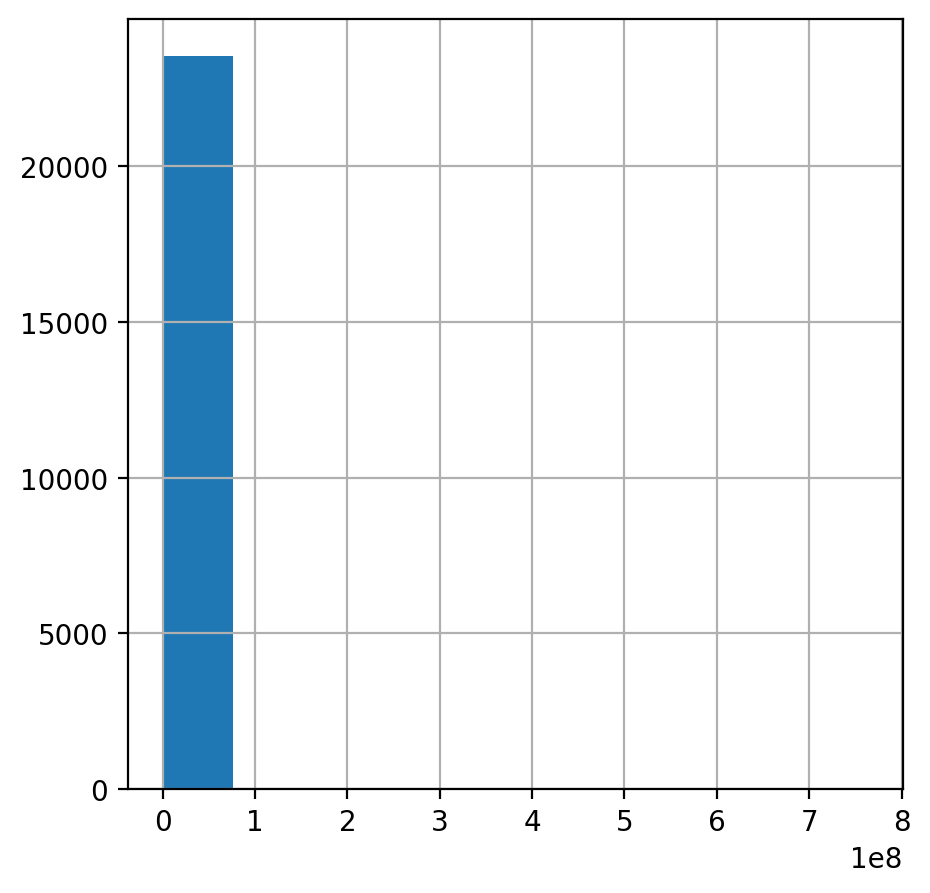

In [59]:
data['last_price'].hist(figsize=(5,5)); 
# На гистограмме можем увидеть очевидное ненормальное распределение, что указывает на выбросы

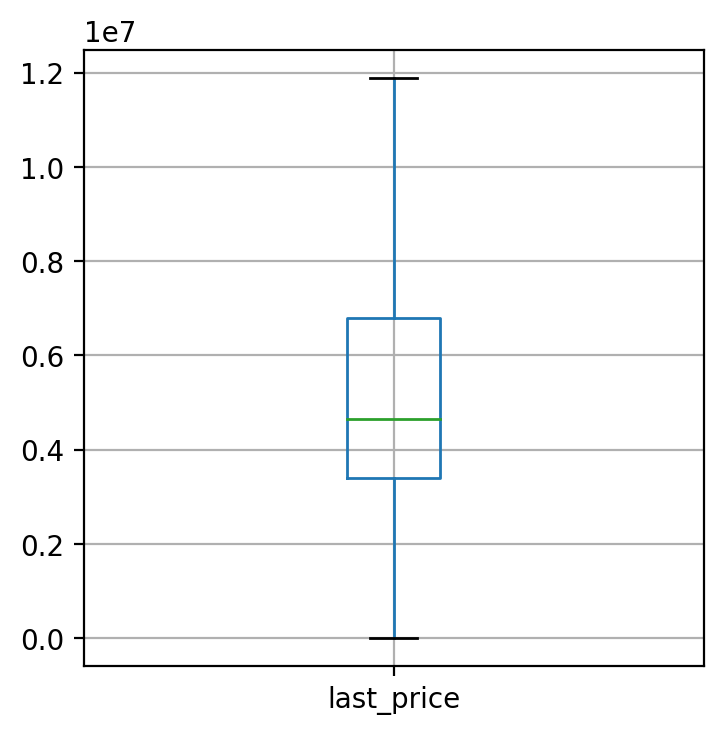

In [60]:
data.boxplot('last_price', figsize=(4, 4), showfliers=False); 
# Построим boxplot без отображения выбросов. Здесь мы можем заметить отметить границу

In [61]:
(data['last_price']<= 1.2e7).mean() 
# Посмотрим сколько значений находится в границах. Более 91%, предположительно мы можем удалить 9% выбросов для чистоты данных

0.9182230127472155

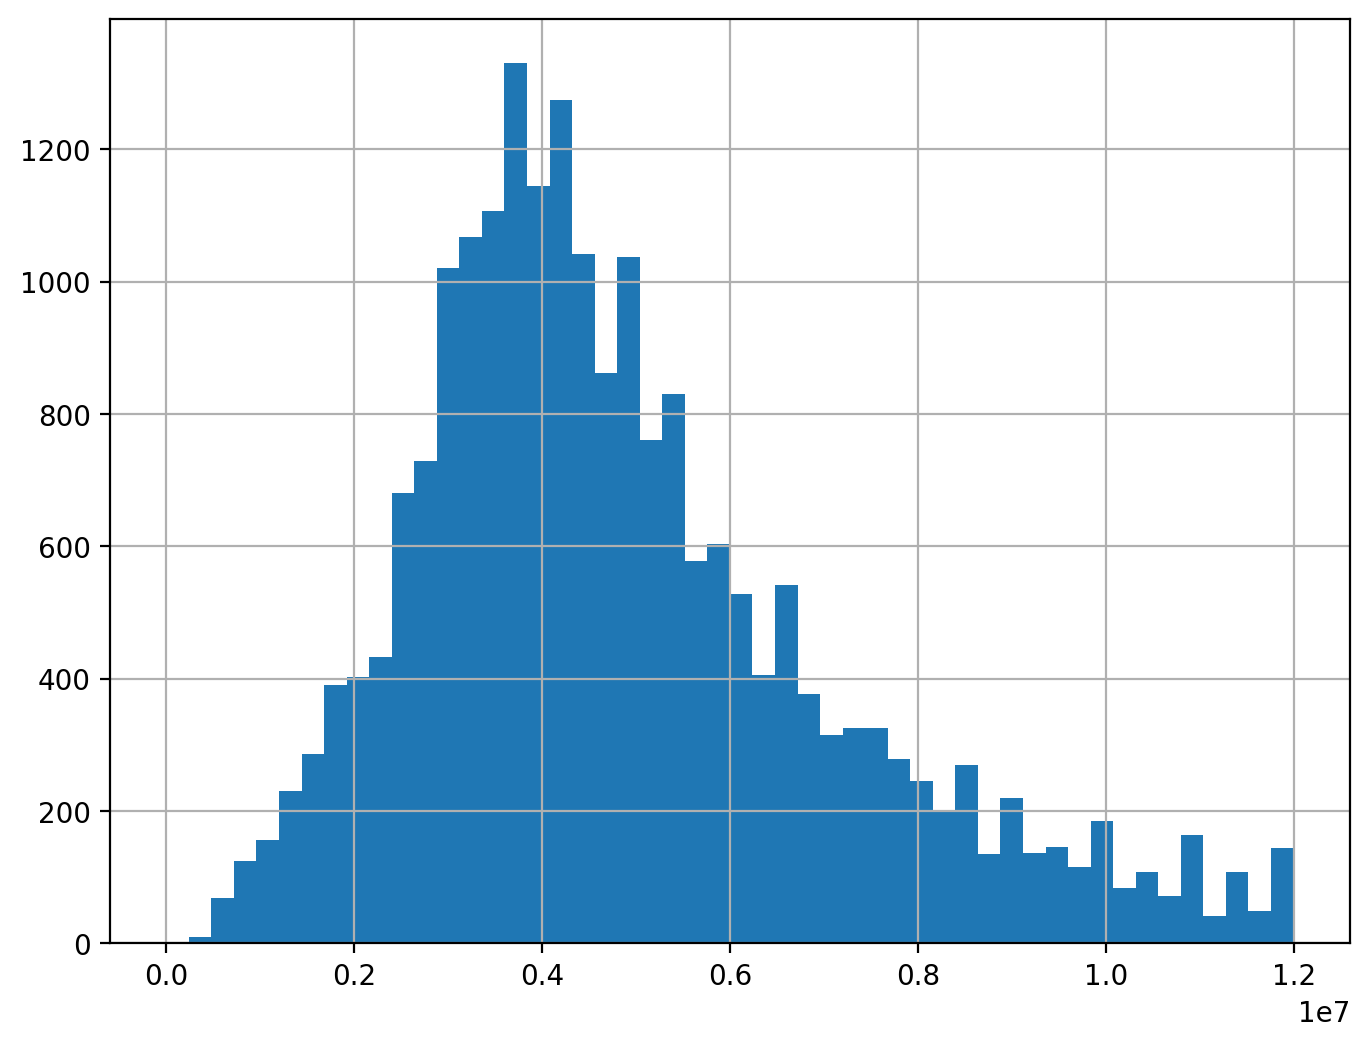

In [62]:
data['last_price'].hist(range=(0,1.2e7), figsize=(8,6),bins=50); 
# Построим гистаграмму в найденных границах. Теперь распределение выглядит нормальным

In [63]:
data['spb']=data['locality_name'] == "Санкт-Петербург" 
# Чтобы посмотреть распределение по Санкт-Петербургу и других населенных пунктам, добавим отдельно столбец, которые показывает из Санкт-Петербурга квартира или нет

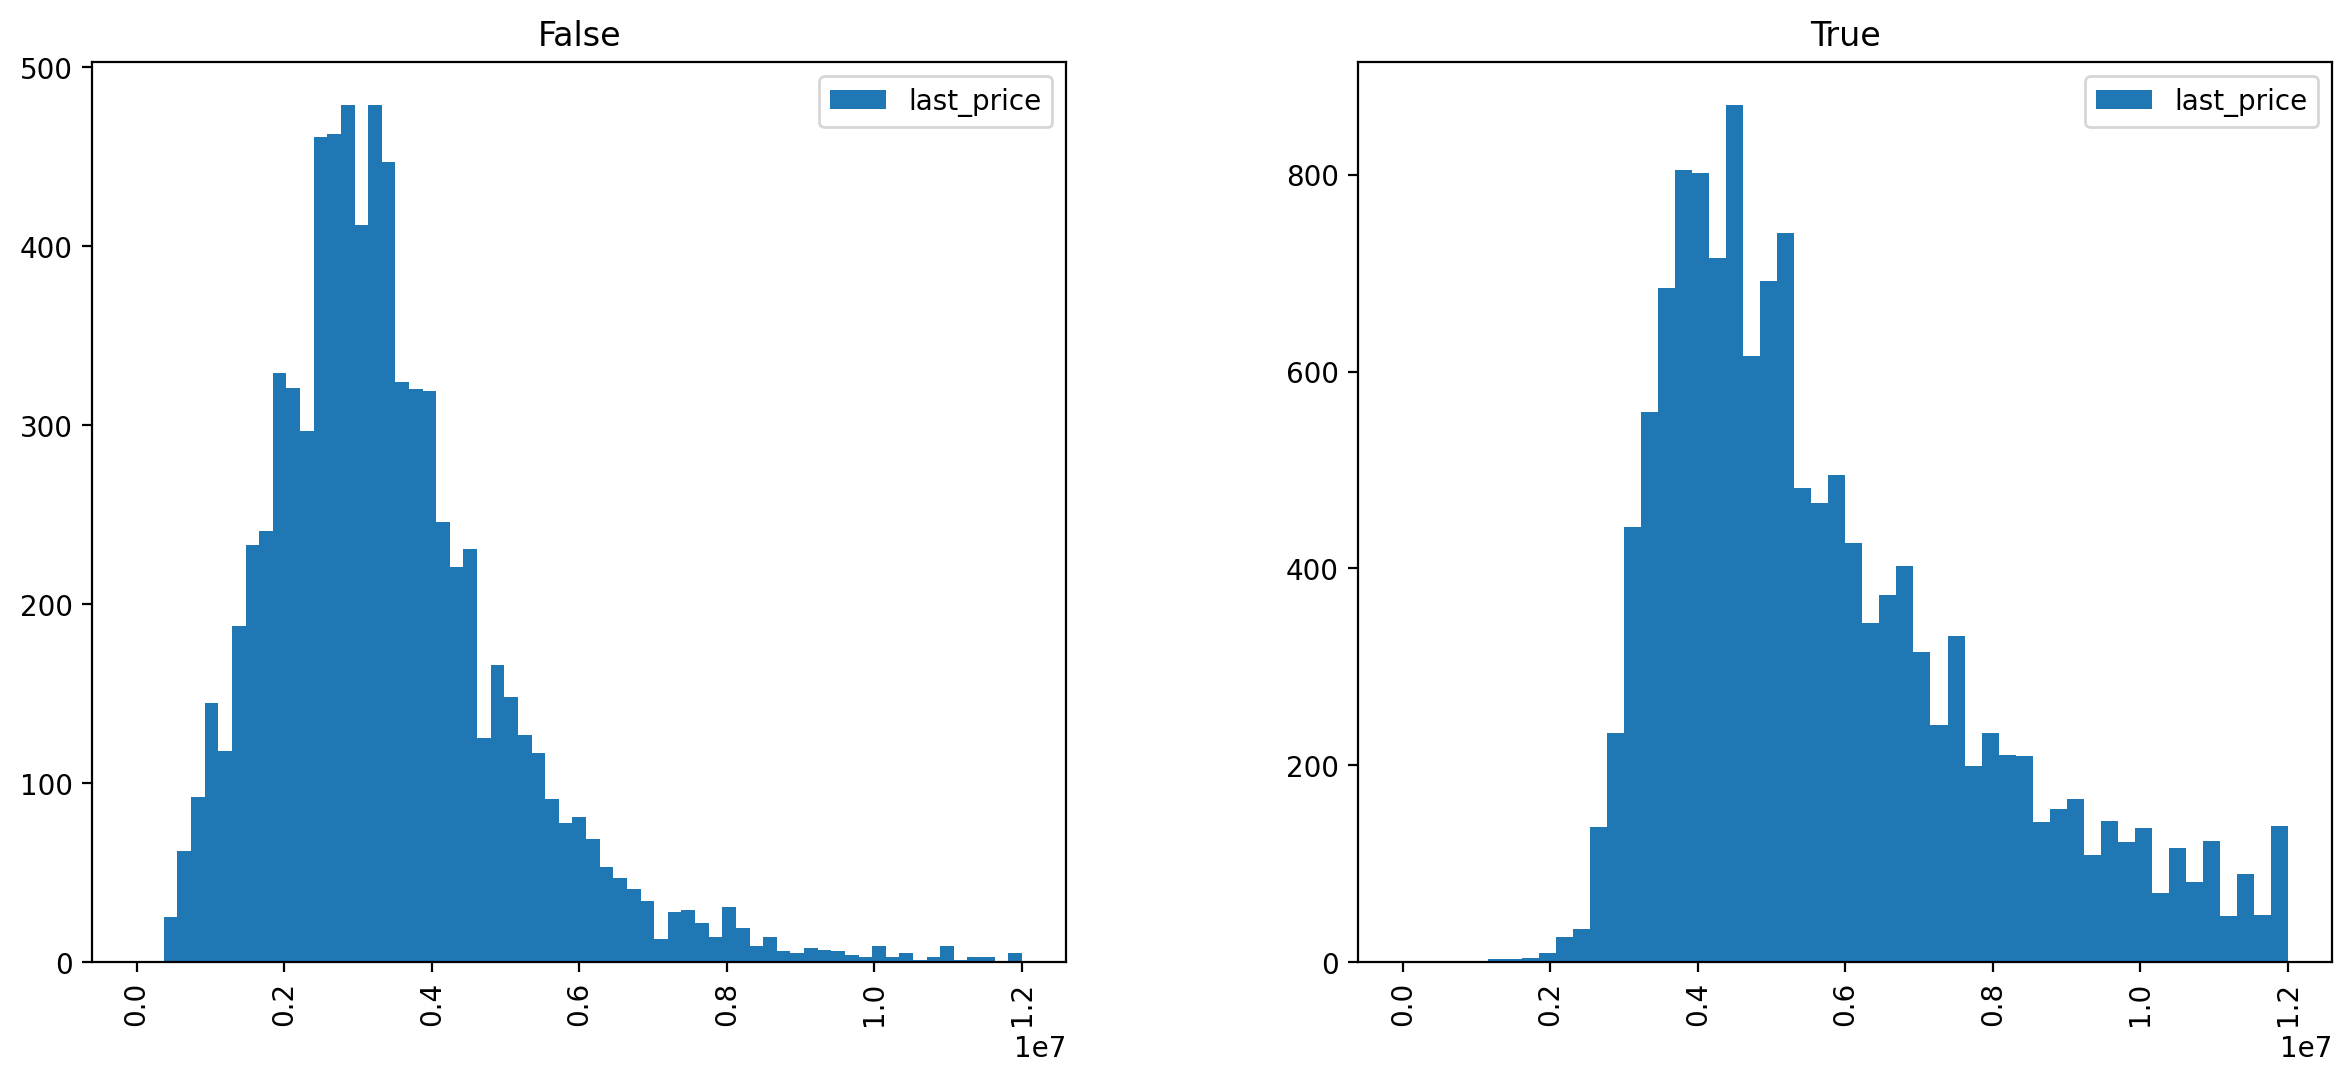

In [64]:
data.hist(column='last_price',by='spb',figsize=(14,6),legend=True,range=(0,1.2e7),bins='auto');
#Построим гистограмму в пределах значений для Санкт-Петербурга и других населенных пунктов

Гистограмма `False` - гистограмма по стоимости квартир в Ленинградской области
  
Гистограмма `True` - гистограмма по стоимости квартир в Санкт-Петербурге

По полученых гистограммам видно, что максимальная стоимость в Санкт-Петербурге и в Ленинградской области отличается. 

Удалим выбросы из данных

In [65]:
data=data.query('(last_price >= 0) and (last_price<=1.2e7)')

In [66]:
data.info() # Посмотрим на новые данные. Кол-во данных изменилось

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21682 entries, 1 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21682 non-null  int64  
 1   last_price            21682 non-null  float64
 2   total_area            21682 non-null  float64
 3   first_day_exposition  21682 non-null  object 
 4   rooms                 21682 non-null  int64  
 5   ceiling_height        21531 non-null  float64
 6   floors_total          21682 non-null  float64
 7   living_area           21682 non-null  float64
 8   floor                 21682 non-null  int64  
 9   is_apartment          21682 non-null  bool   
 10  studio                21682 non-null  bool   
 11  open_plan             21682 non-null  bool   
 12  kitchen_area          21682 non-null  float64
 13  balcony               21682 non-null  float64
 14  locality_name         21682 non-null  object 
 15  airports_nearest   

После обработки данных посмотрим еще раз на гистограммы

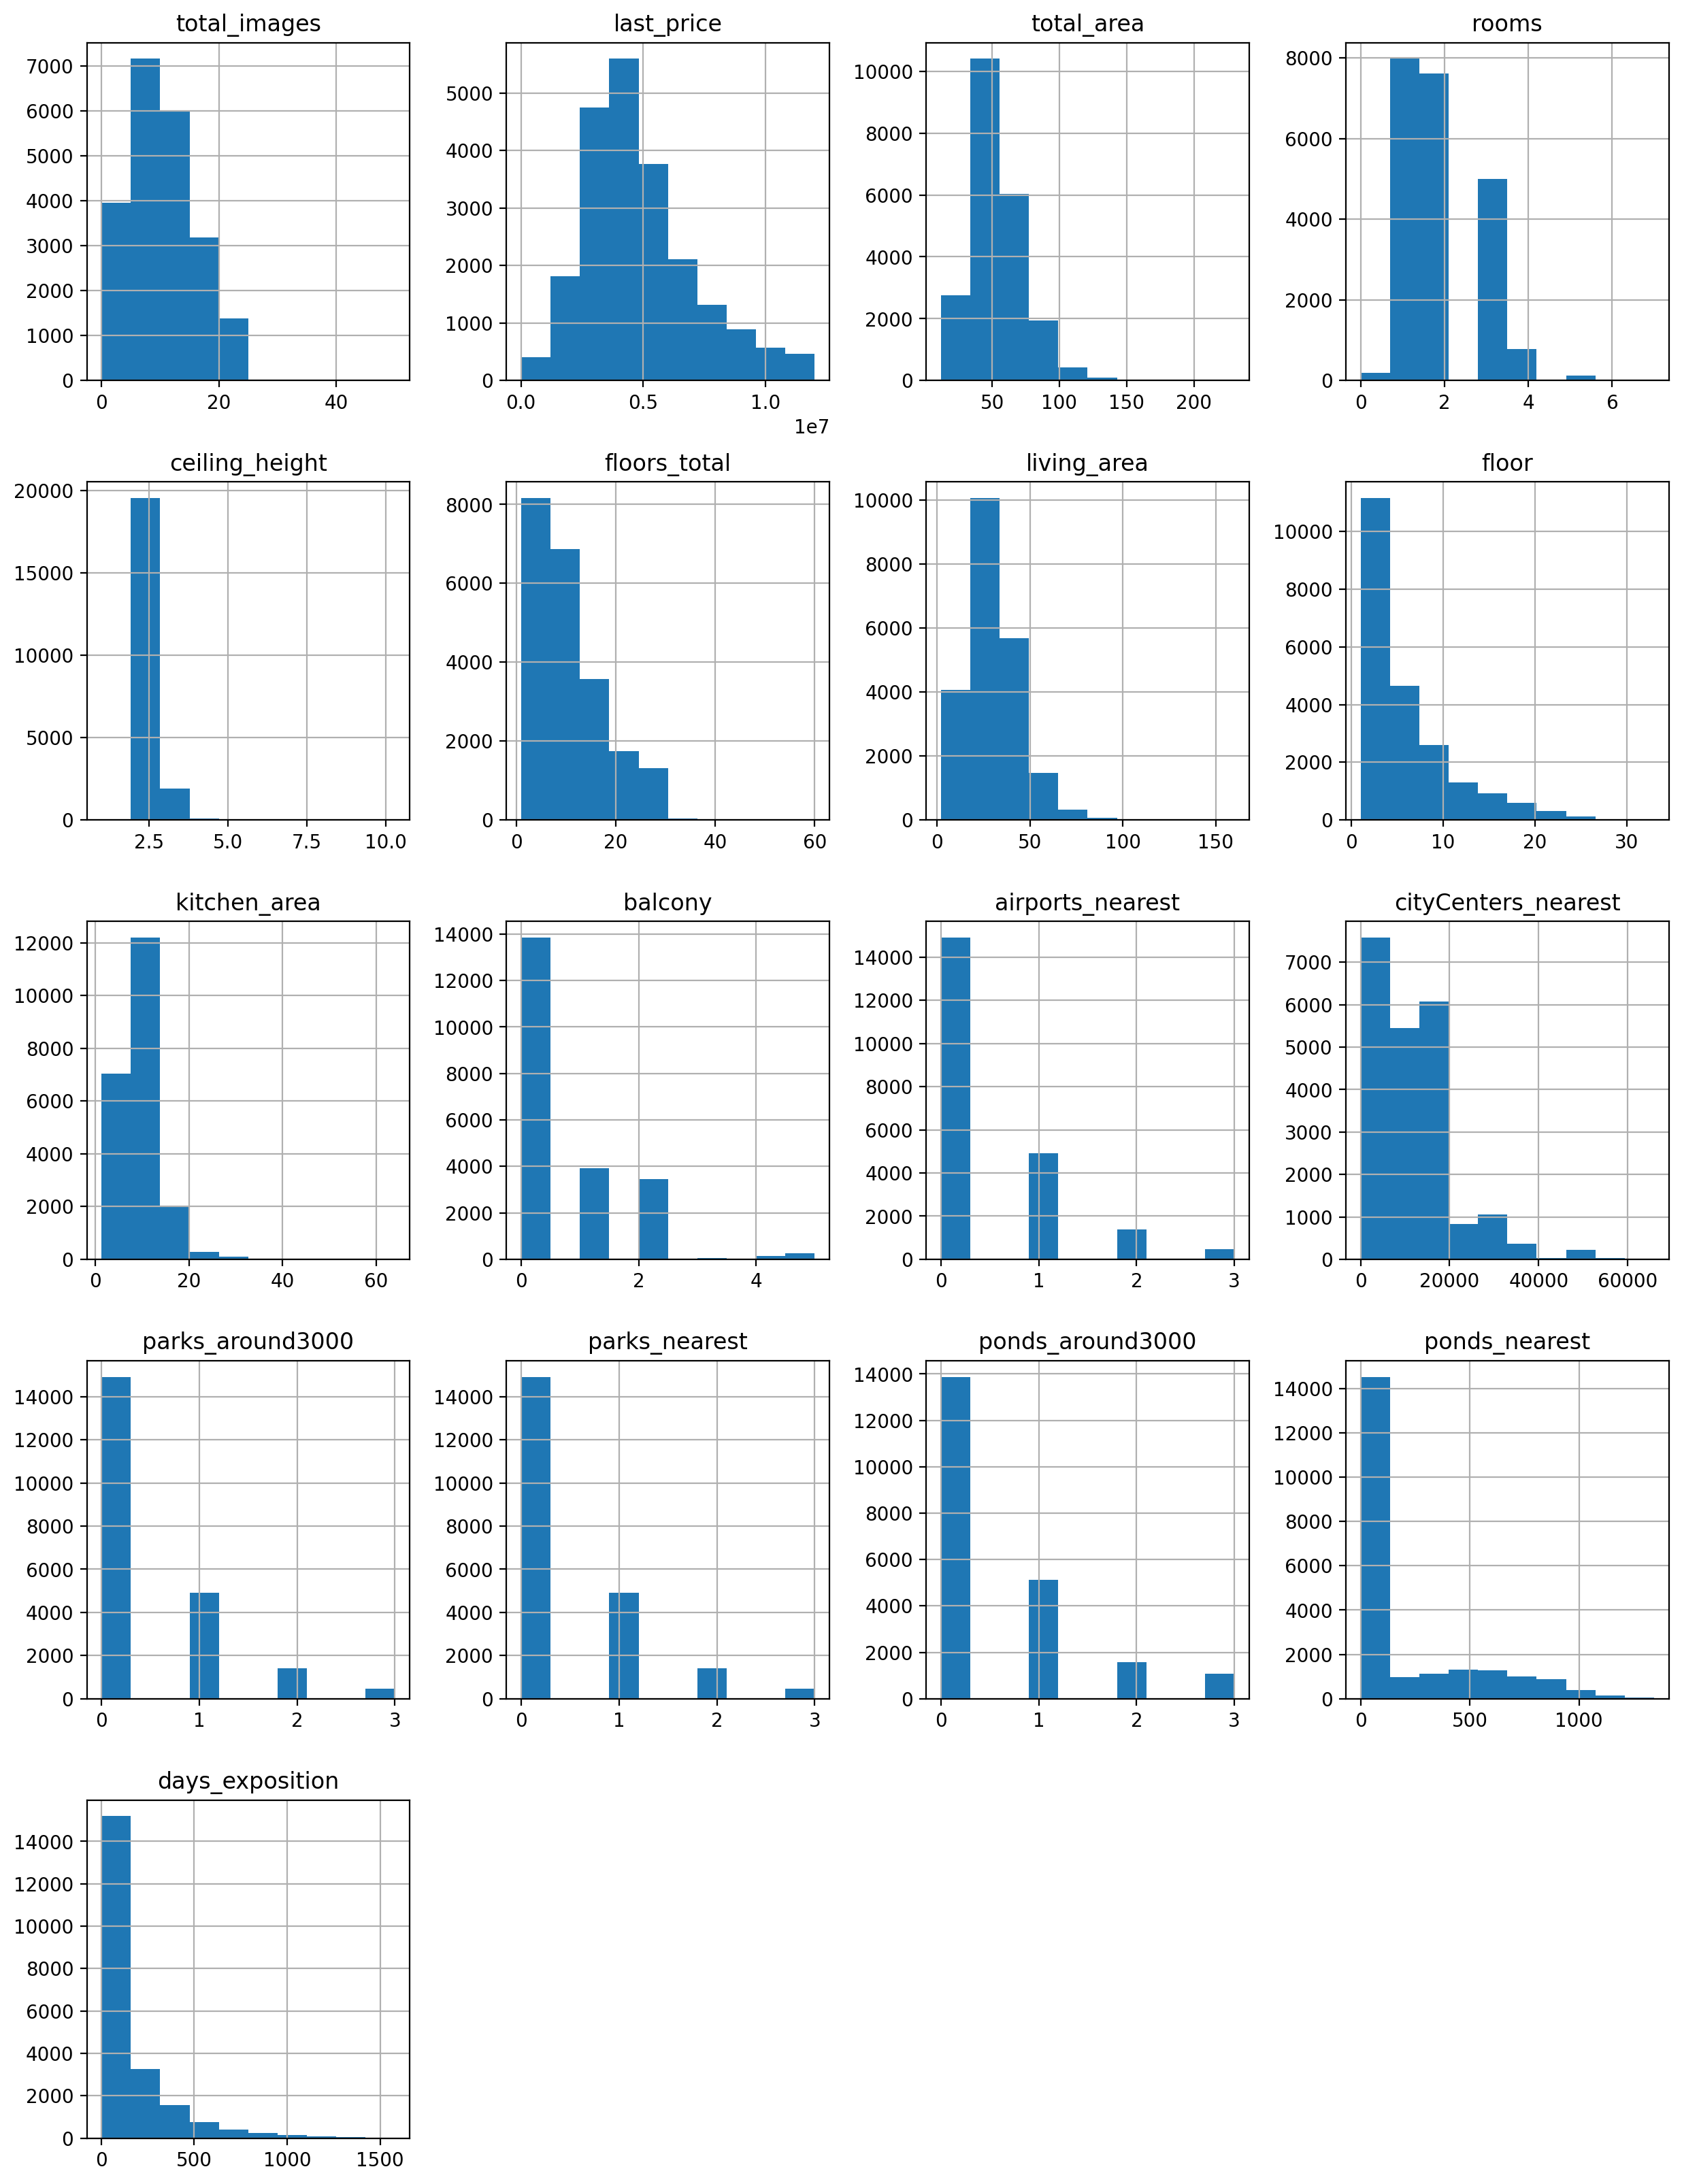

In [67]:
data.hist(figsize=(15,20));

Остальные столбцы имеют нормальное распределение, кроме `ceiling_height` ,`days_exposition`,`total_area`

Рассмотрим столбец `ceiling_height`

In [68]:
data['ceiling_height'].describe() 
# По общему описанию аномальных значений можем увидеть аномально высокое значение

count    21531.000000
mean         2.702780
std          0.213842
min          1.000000
25%          2.568214
50%          2.700000
75%          2.766111
max         10.300000
Name: ceiling_height, dtype: float64

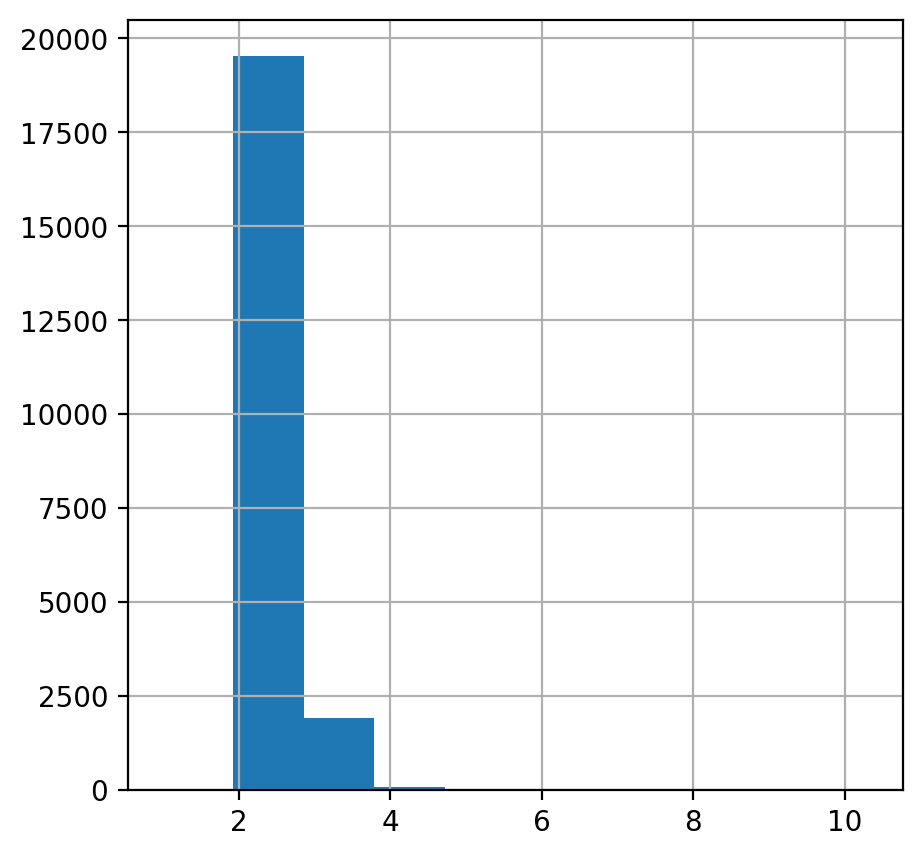

In [69]:
data['ceiling_height'].hist(figsize=(5,5)); 
# Визуально мы также отмечаем ненормальное распределение, что говорит о том, что выбросы присутствуют

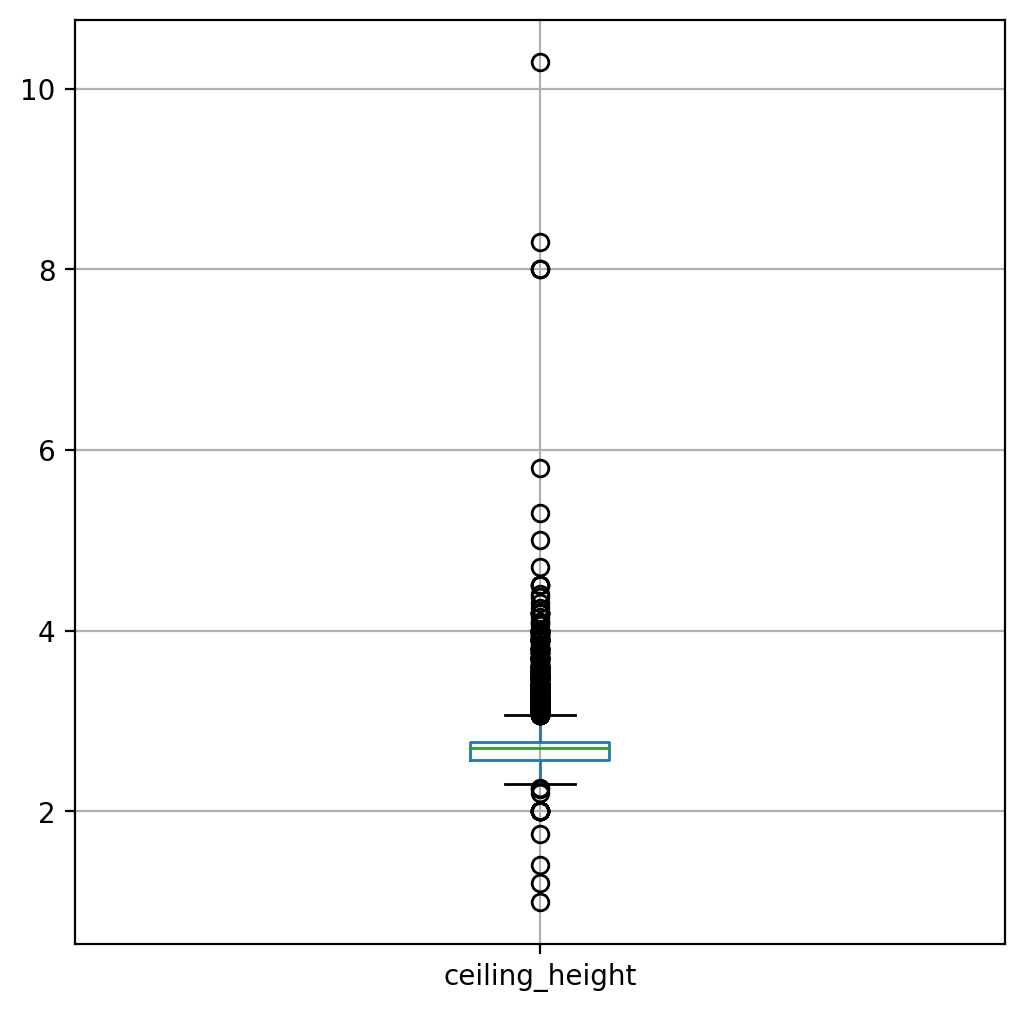

In [70]:
data.boxplot('ceiling_height', figsize=(6, 6)); # Здесь также можно отметить выбросы

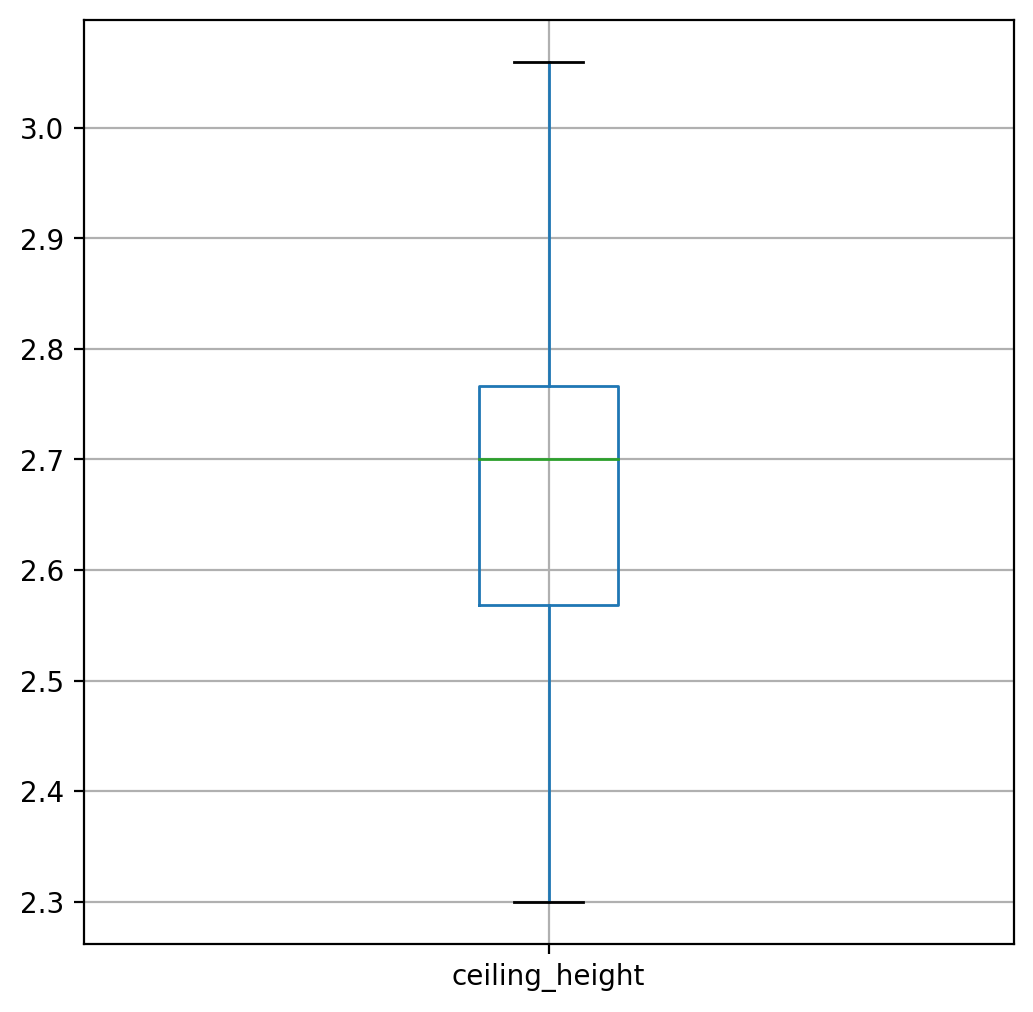

In [71]:
data.boxplot('ceiling_height', figsize=(6, 6), showfliers=False);

In [72]:
(data['ceiling_height']<= 3.5).mean() # Процент выбросов меньше 2%, можем удалить их

0.9861175168342404

In [73]:
data=data.query('(ceiling_height <=3.5) and (ceiling_height >=2.3)') # Удалим значения, выходящие за диапазон

In [74]:
data.info() #Кол-во значений уменьшилось

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21363 entries, 1 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          21363 non-null  int64  
 1   last_price            21363 non-null  float64
 2   total_area            21363 non-null  float64
 3   first_day_exposition  21363 non-null  object 
 4   rooms                 21363 non-null  int64  
 5   ceiling_height        21363 non-null  float64
 6   floors_total          21363 non-null  float64
 7   living_area           21363 non-null  float64
 8   floor                 21363 non-null  int64  
 9   is_apartment          21363 non-null  bool   
 10  studio                21363 non-null  bool   
 11  open_plan             21363 non-null  bool   
 12  kitchen_area          21363 non-null  float64
 13  balcony               21363 non-null  float64
 14  locality_name         21363 non-null  object 
 15  airports_nearest   

Рассмотрим столбец `days_exposition`

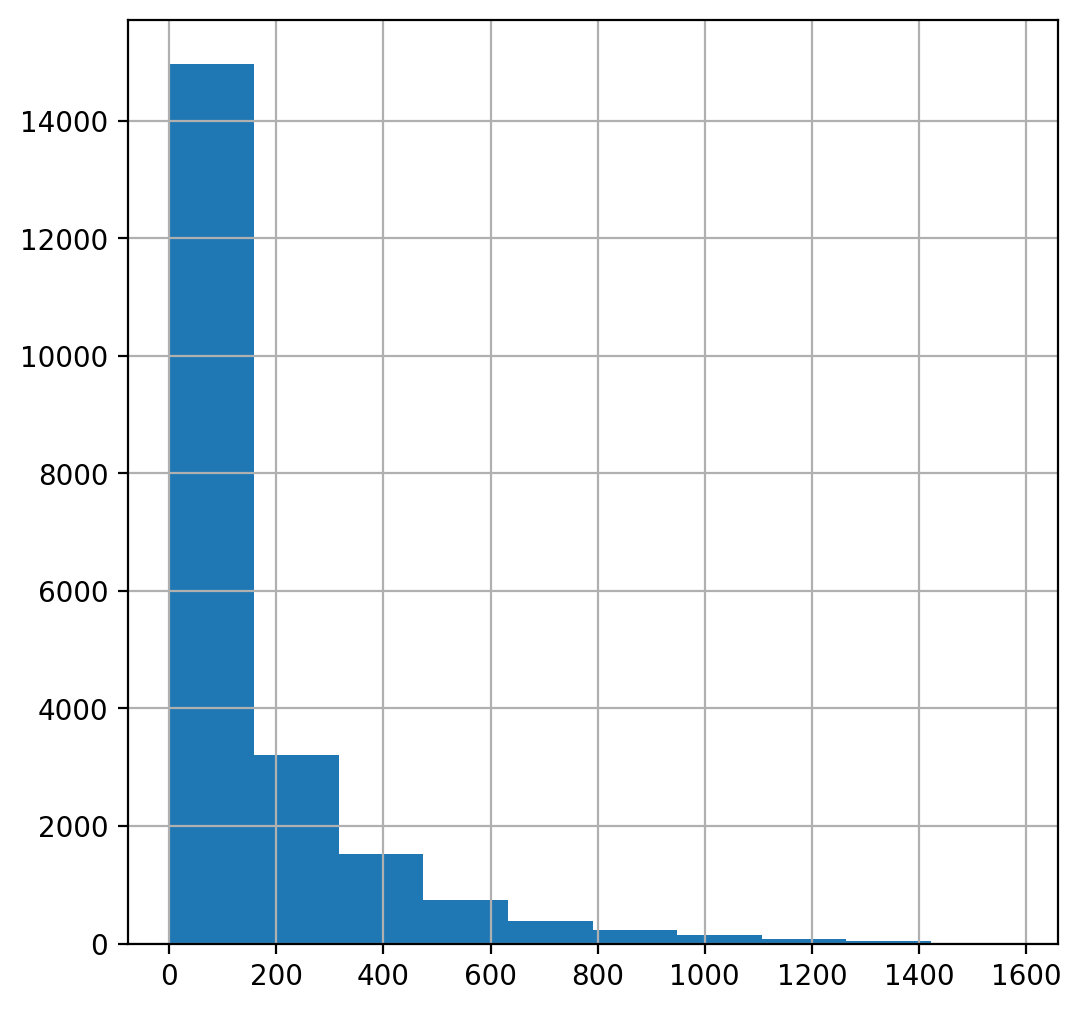

In [75]:
data['days_exposition'].hist(figsize=(6,6));  # По гистрограмме видим выбросы

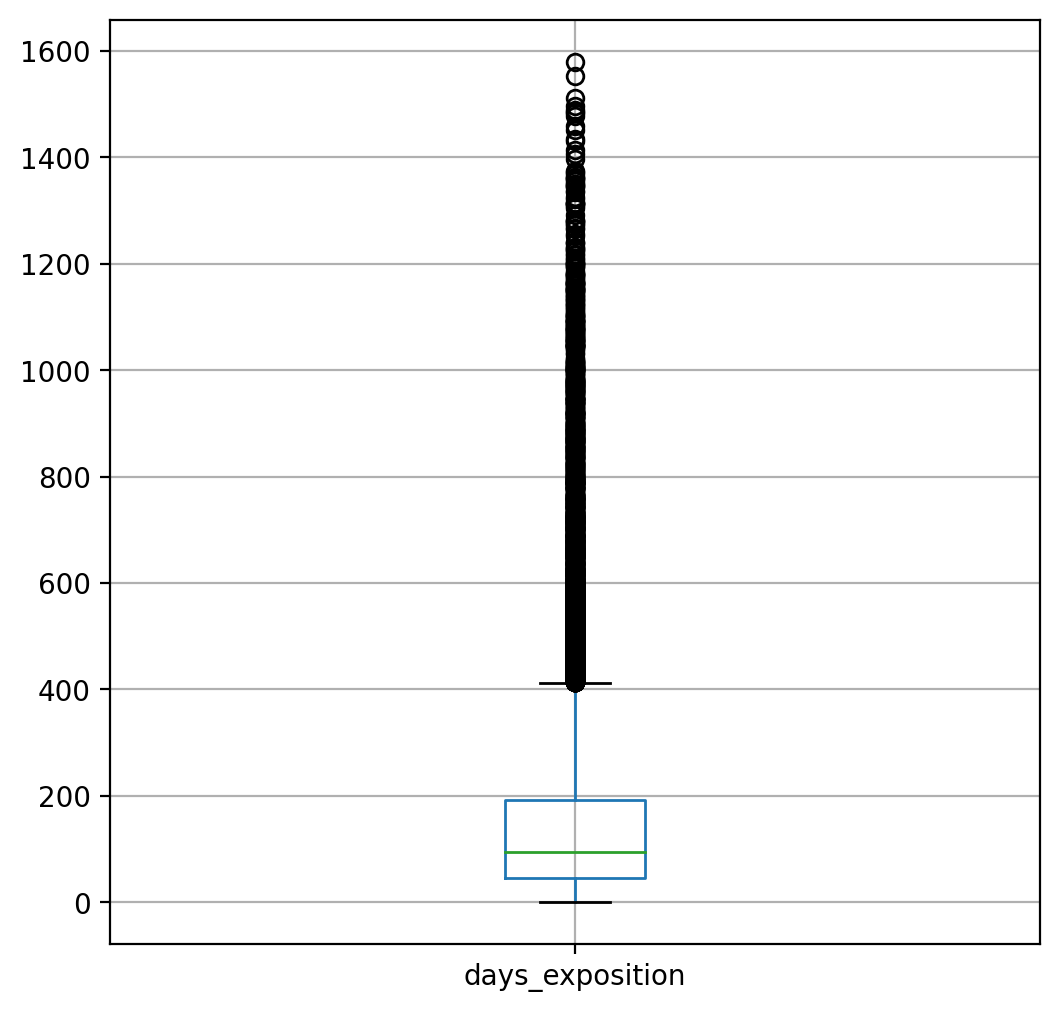

In [76]:
data.boxplot('days_exposition', figsize=(6, 6)); # Можем отметить достаточно много выборосов

In [77]:
(data['days_exposition']<= 600).mean() # Процент выборосов около 5%

0.9528156157843

In [78]:
data=data.query('days_exposition<= 600') # Удалим значения, выходящие за диапазон. Оставим значения меньше 600 дней

In [79]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20355 entries, 1 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          20355 non-null  int64  
 1   last_price            20355 non-null  float64
 2   total_area            20355 non-null  float64
 3   first_day_exposition  20355 non-null  object 
 4   rooms                 20355 non-null  int64  
 5   ceiling_height        20355 non-null  float64
 6   floors_total          20355 non-null  float64
 7   living_area           20355 non-null  float64
 8   floor                 20355 non-null  int64  
 9   is_apartment          20355 non-null  bool   
 10  studio                20355 non-null  bool   
 11  open_plan             20355 non-null  bool   
 12  kitchen_area          20355 non-null  float64
 13  balcony               20355 non-null  float64
 14  locality_name         20355 non-null  object 
 15  airports_nearest   

Рассмотрим столбец `total_area`

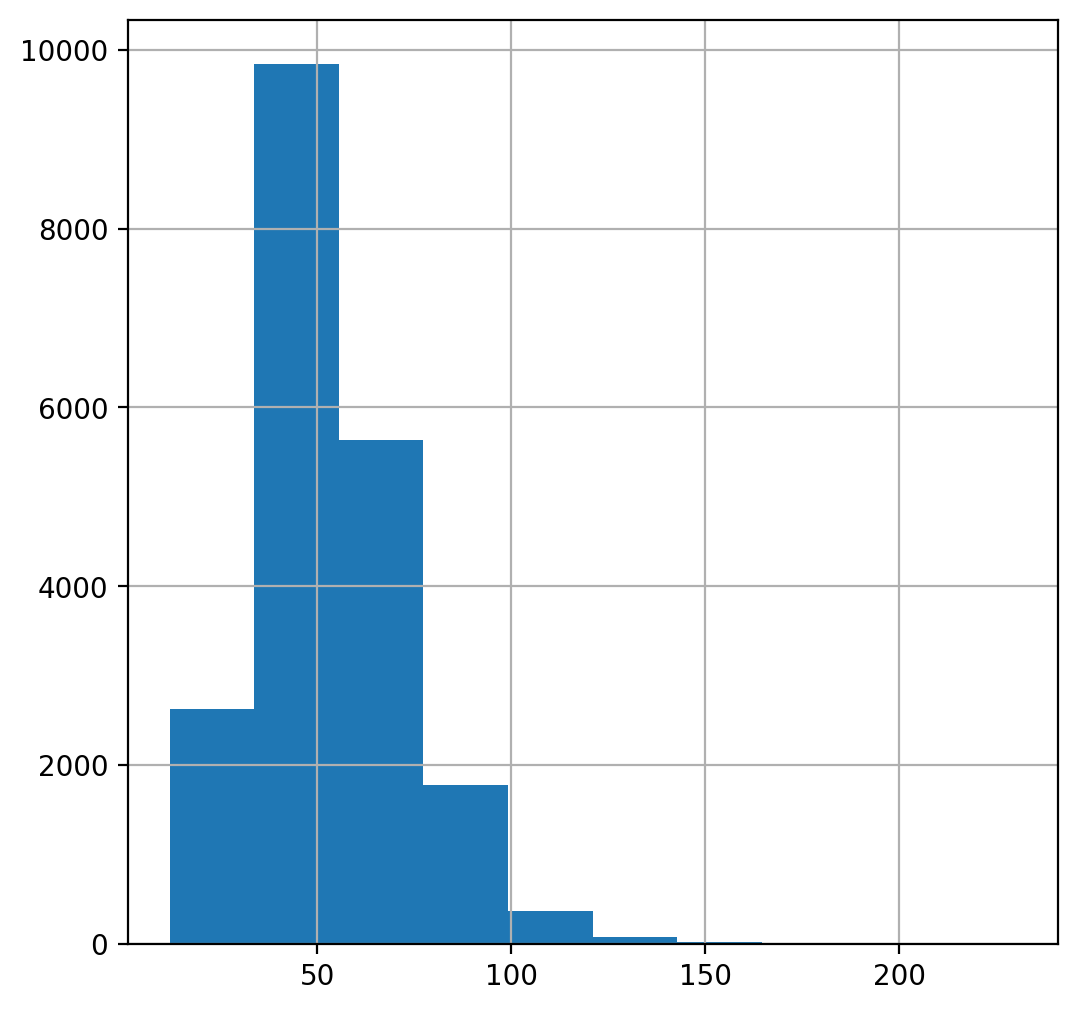

In [80]:
data['total_area'].hist(figsize=(6,6)); # На гистрограмме мы можем отметить выбросы

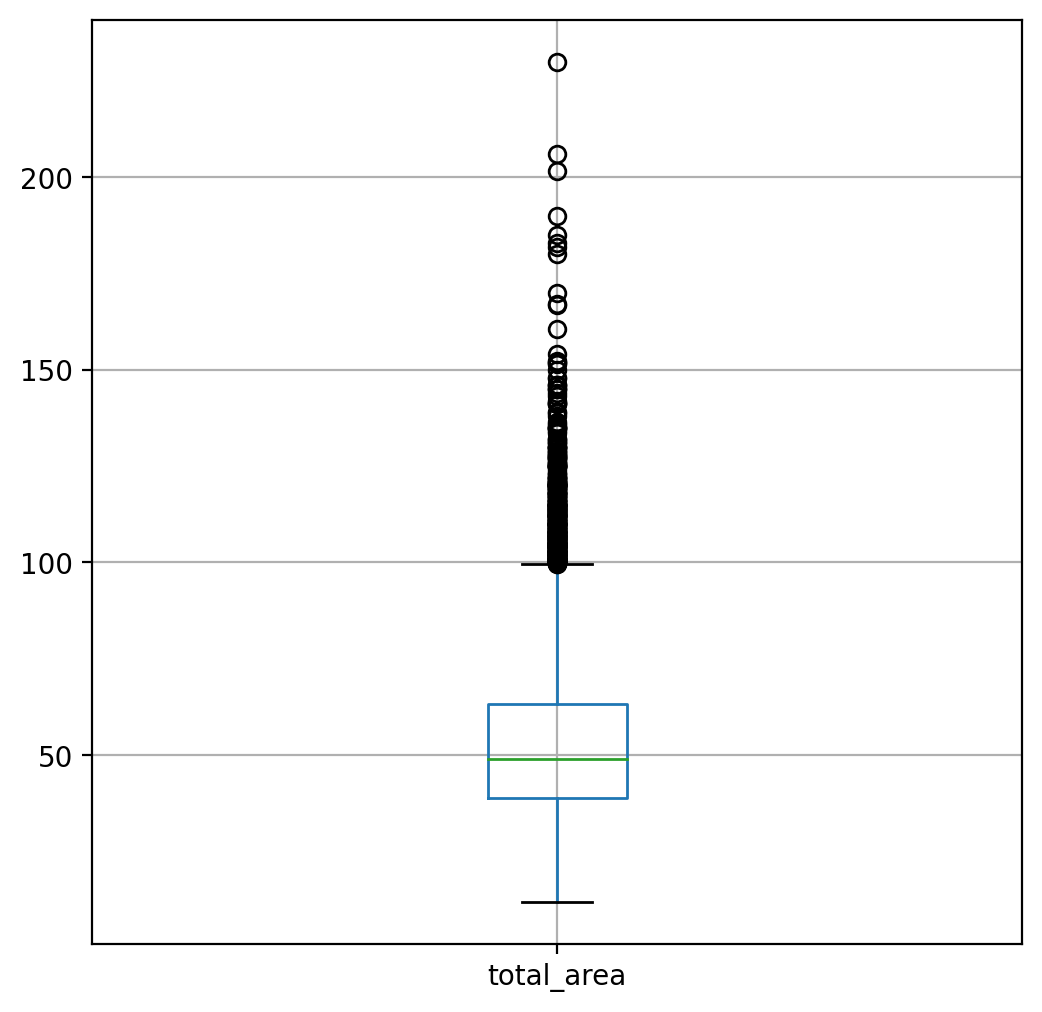

In [81]:
data.boxplot('total_area', figsize=(6, 6)); # Здесь также может выдеть выбрсоы, верхняя граница в районе 100 кв. метров

In [82]:
(data['total_area']<= 100).mean() # Процент выбросов около 3%

0.9789732252517809

In [83]:
data=data.query('total_area <=100') # Удалим выбросы

Посмотрим на столбец `cityCenters_nearest`

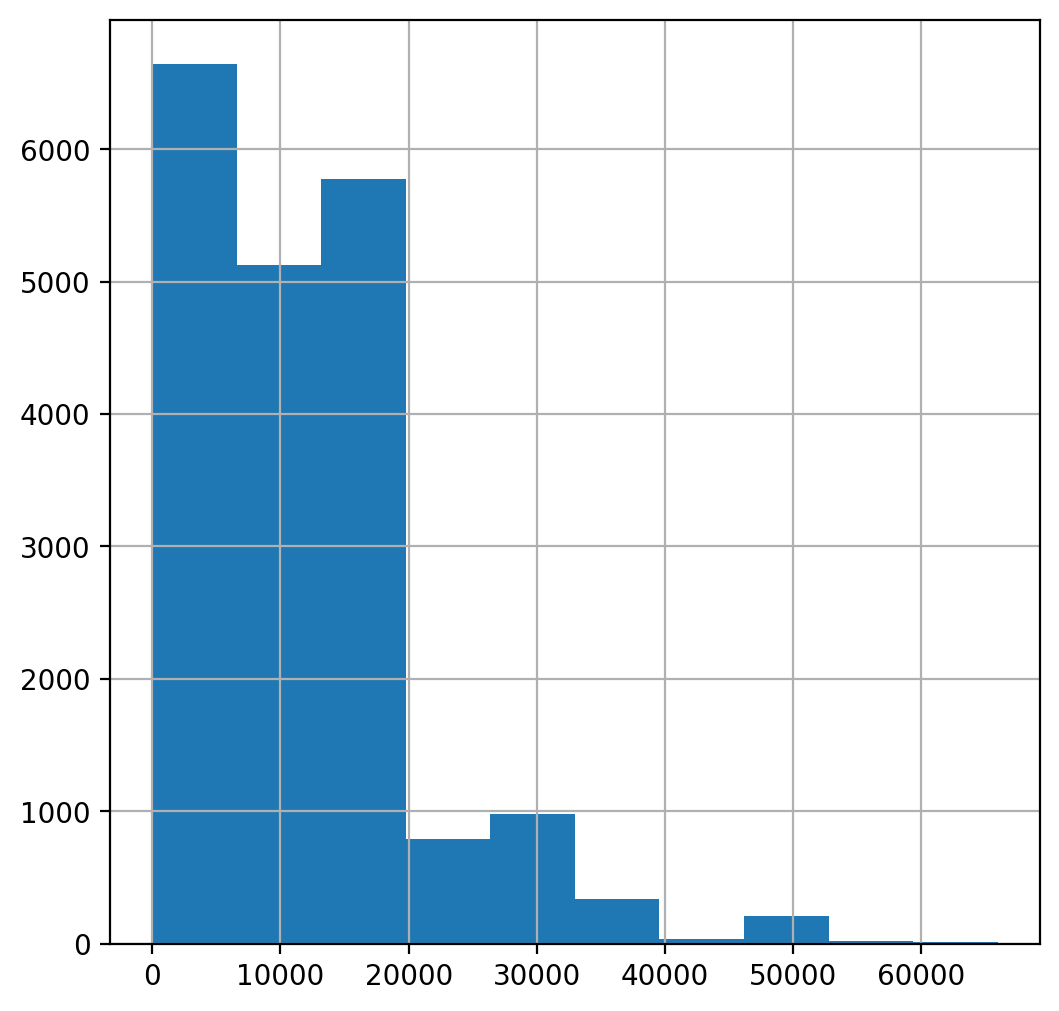

In [84]:
data['cityCenters_nearest'].hist(figsize=(6,6));

Мы можем заметить небольшие выбросы больших значений

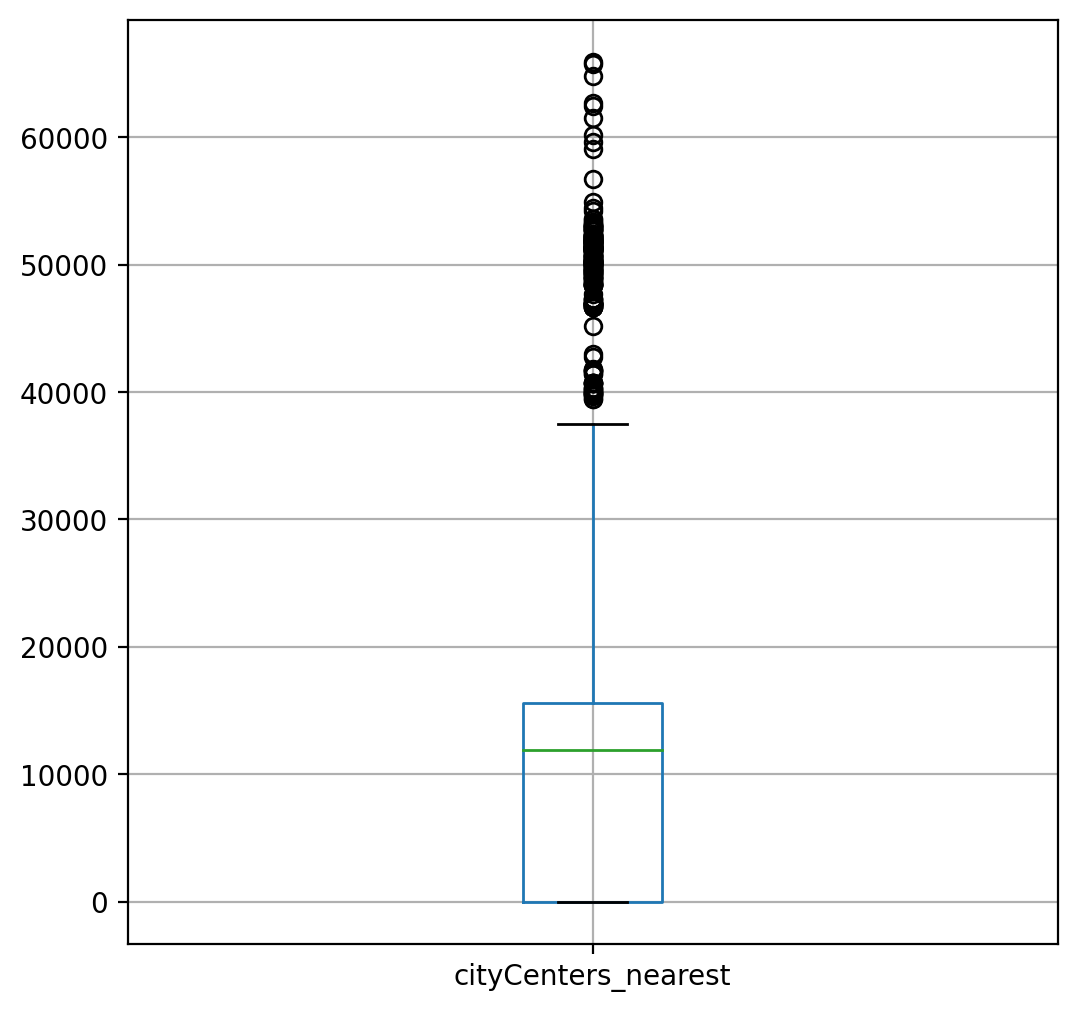

In [85]:
data.boxplot('cityCenters_nearest', figsize=(6, 6));

In [86]:
(data['cityCenters_nearest']<= 40000).mean() # Выборосов меньше 2%, их можно удалить

0.9869021930044664

In [87]:
data=data.query('cityCenters_nearest <=40000')

In [88]:
data.info() #Кол-во значений уменьшилось

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19666 entries, 1 to 23698
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          19666 non-null  int64  
 1   last_price            19666 non-null  float64
 2   total_area            19666 non-null  float64
 3   first_day_exposition  19666 non-null  object 
 4   rooms                 19666 non-null  int64  
 5   ceiling_height        19666 non-null  float64
 6   floors_total          19666 non-null  float64
 7   living_area           19666 non-null  float64
 8   floor                 19666 non-null  int64  
 9   is_apartment          19666 non-null  bool   
 10  studio                19666 non-null  bool   
 11  open_plan             19666 non-null  bool   
 12  kitchen_area          19666 non-null  float64
 13  balcony               19666 non-null  float64
 14  locality_name         19666 non-null  object 
 15  airports_nearest   

<b>Вывод:</b>  Некоторые данные имеют выбросы, которые могут быть связаны либо с техническими ошибками (неверный формат или ошибка при вырузке данных), либо человеческий фактор (некорректное заполнение полей).

### Посчитайте и добавьте в таблицу новые столбцы

Цена одного квадратного метра:

In [89]:
data['price_m']=data['last_price']/data['total_area'] # Разделим стоимость на общую площадь

In [90]:
data.head() # Проверим добавился ли столбец. Добавился

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,spb,price_m
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.644470,11.0,18.6,1,True,...,Шушары,0.0,18603.0,0.0,0.0,0.0,0.0,81.0,False,82920.792079
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.766111,5.0,34.3,4,True,...,Санкт-Петербург,1.0,13933.0,1.0,1.0,2.0,574.0,558.0,True,92785.714286
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.030000,14.0,32.0,13,True,...,Санкт-Петербург,2.0,8098.0,2.0,2.0,1.0,48.0,121.0,True,100000.000000
5,10,2890000.0,30.4,2018-09-10T00:00:00,1,2.617600,12.0,14.4,5,True,...,Янино-1,0.0,0.0,0.0,0.0,0.0,0.0,55.0,False,95065.789474
6,6,3700000.0,37.3,2017-11-02T00:00:00,1,2.630292,26.0,10.6,6,True,...,Парголово,0.0,19143.0,0.0,0.0,0.0,0.0,155.0,False,99195.710456


День недели публикации объявления (0 — понедельник, 1 — вторник и так далее):

In [91]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')

In [92]:
data['weekday'] = data['first_day_exposition'].dt.weekday

Месяц публикации объявления:

In [93]:
data['month_exposition']=data['first_day_exposition'].dt.month # Применим метод и создадим новый столбец

Год публикации объявления:

In [94]:
data['year_exposition']=data['first_day_exposition'].dt.year # Применим метод и создадим новый столбец

In [95]:
data.head() # Проверим, добавились ли новые столбцы

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,spb,price_m,weekday,month_exposition,year_exposition
1,7,3350000.0,40.4,2018-12-04,1,2.644470,11.0,18.6,1,True,...,0.0,0.0,0.0,0.0,81.0,False,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.766111,5.0,34.3,4,True,...,1.0,1.0,2.0,574.0,558.0,True,92785.714286,3,8,2015
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,True,...,2.0,2.0,1.0,48.0,121.0,True,100000.000000,1,6,2018
5,10,2890000.0,30.4,2018-09-10,1,2.617600,12.0,14.4,5,True,...,0.0,0.0,0.0,0.0,55.0,False,95065.789474,0,9,2018
6,6,3700000.0,37.3,2017-11-02,1,2.630292,26.0,10.6,6,True,...,0.0,0.0,0.0,0.0,155.0,False,99195.710456,3,11,2017


Тип этажа квартиры (значения — «‎первый», «последний», «другой»)

In [96]:
def type_floor(row):  
    if row['floor'] == 1:
        return 'первый'
    elif row['floors_total'] == row['floor']:
        return 'последний'
    else:
        return 'другой'
# Напишем функцию для определения типа этажа

In [97]:
data['floor_type'] = data.apply(type_floor, axis=1) # Применим функцию и создадим новый столбец

In [98]:
data.head() # Выведем для проверки, все работает

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,spb,price_m,weekday,month_exposition,year_exposition,floor_type
1,7,3350000.0,40.4,2018-12-04,1,2.644470,11.0,18.6,1,True,...,0.0,0.0,0.0,81.0,False,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.766111,5.0,34.3,4,True,...,1.0,2.0,574.0,558.0,True,92785.714286,3,8,2015,другой
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,True,...,2.0,1.0,48.0,121.0,True,100000.000000,1,6,2018,другой
5,10,2890000.0,30.4,2018-09-10,1,2.617600,12.0,14.4,5,True,...,0.0,0.0,0.0,55.0,False,95065.789474,0,9,2018,другой
6,6,3700000.0,37.3,2017-11-02,1,2.630292,26.0,10.6,6,True,...,0.0,0.0,0.0,155.0,False,99195.710456,3,11,2017,другой


Расстояние до центра города в километрах:

In [99]:
def m_to_km (meters):
    km=meters/1000
    return round (km)
# Напишем функцию, которая будет переводить значения в километры и округлять

In [100]:
m_to_km(1000000) # Проверим работу фукнции

1000

In [101]:
data['distance_in_km'] = data['cityCenters_nearest'].apply(m_to_km) # Применим функцию и добавим новый столбец

In [102]:
data.head() # Проверим вывод. Работает!

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,spb,price_m,weekday,month_exposition,year_exposition,floor_type,distance_in_km
1,7,3350000.0,40.4,2018-12-04,1,2.644470,11.0,18.6,1,True,...,0.0,0.0,81.0,False,82920.792079,1,12,2018,первый,19
2,10,5196000.0,56.0,2015-08-20,2,2.766111,5.0,34.3,4,True,...,2.0,574.0,558.0,True,92785.714286,3,8,2015,другой,14
4,2,10000000.0,100.0,2018-06-19,2,3.030000,14.0,32.0,13,True,...,1.0,48.0,121.0,True,100000.000000,1,6,2018,другой,8
5,10,2890000.0,30.4,2018-09-10,1,2.617600,12.0,14.4,5,True,...,0.0,0.0,55.0,False,95065.789474,0,9,2018,другой,0
6,6,3700000.0,37.3,2017-11-02,1,2.630292,26.0,10.6,6,True,...,0.0,0.0,155.0,False,99195.710456,3,11,2017,другой,19


### Проведите исследовательский анализ данных

<b>1. Изучим параметры объектов. </b>

Общая площадь:

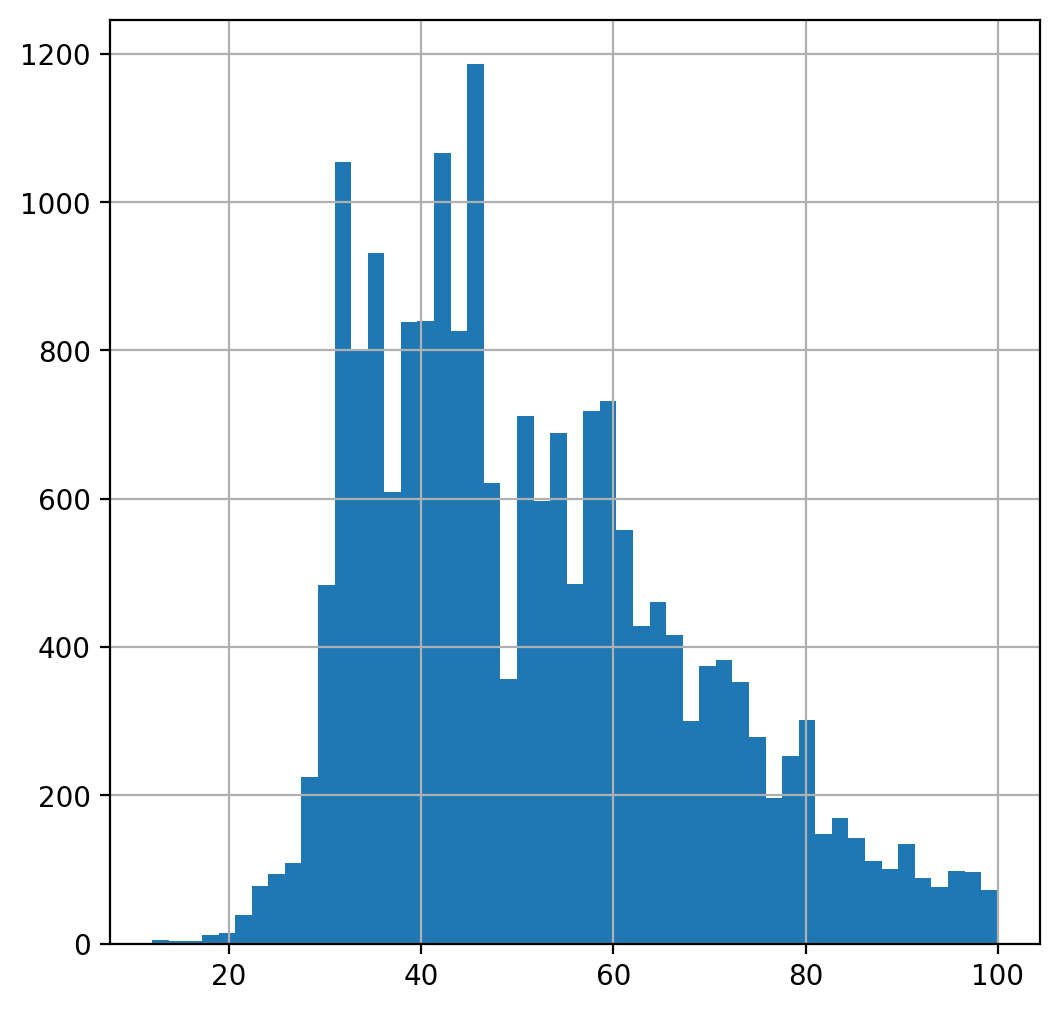

In [103]:
data['total_area'].hist(figsize=(6,6),bins='auto');

In [104]:
data['total_area'].describe()

count    19666.00000
mean        51.84955
std         16.71706
min         12.00000
25%         38.80000
50%         48.20000
75%         62.40000
max        100.00000
Name: total_area, dtype: float64

Гистограмма имеет нормальное распределение. Минимальное значение жилой площаи 12 кв.м., максимальное значение 100 кв.м.
Среднее значение 51.8 кв.м., что подверждает и гистограмма (более 1000 значений).


Жилая площадь:

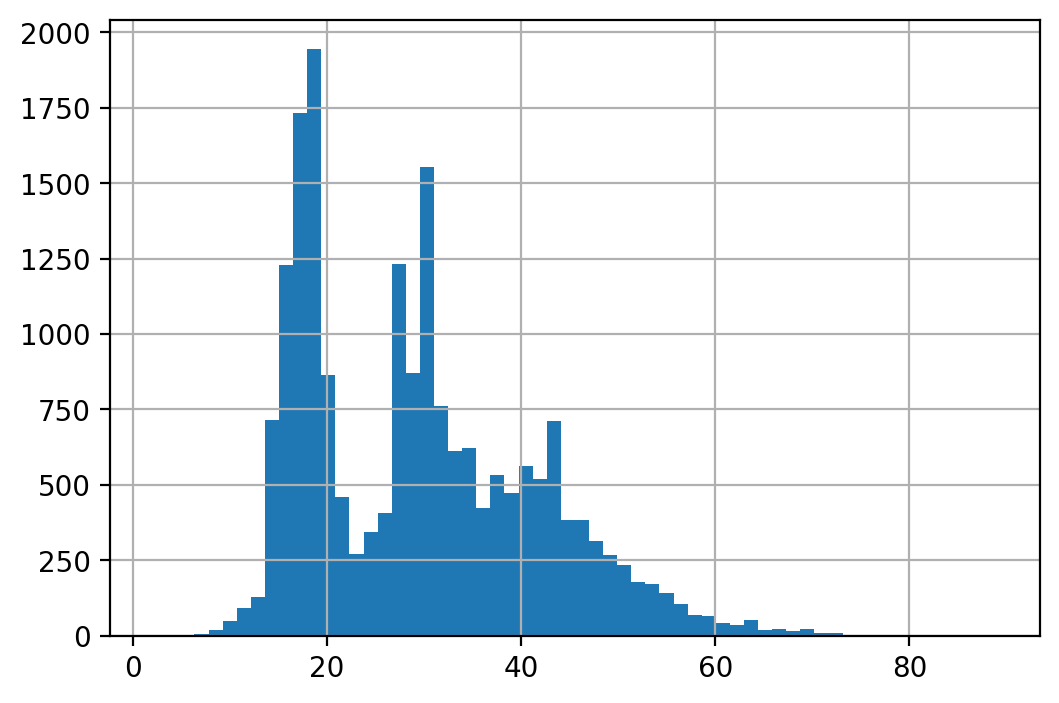

In [105]:
data['living_area'].hist(figsize=(6,4),bins='auto');

In [106]:
data['living_area'].describe()

count    19666.000000
mean        29.606102
std         11.946828
min          2.000000
25%         18.200000
50%         28.900000
75%         38.000000
max         89.100006
Name: living_area, dtype: float64

На гистограмме можем отметить ненормальное распределение. 

Пиковые значения наблюдаются в 1 квартиле около 18кв.м и во втором квартиле около 28 кв.м.

Среднее значение по всей выборке 29.6 кв.м. Максимальное значение 89 кв.м., миниальное 2 кв.м.

Площадь кухни:

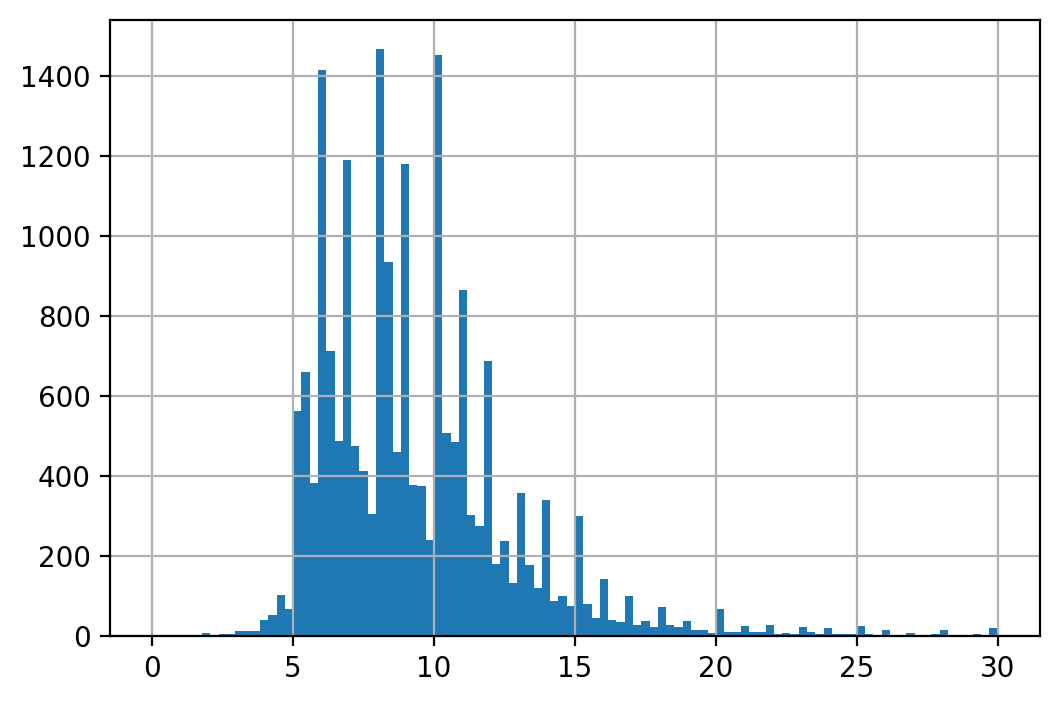

In [107]:
data['kitchen_area'].hist(figsize=(6,4),bins='auto',range=(0,30));

In [108]:
data['kitchen_area'].describe()

count    19666.000000
mean         9.439648
std          3.639570
min          1.300000
25%          7.000000
50%          8.900000
75%         11.000000
max         50.000000
Name: kitchen_area, dtype: float64

Гистрограмма имеет ненормальное распределение.

По гистограмме видим несколько пиковых значений, больше всего квартир имеют кухонную площадь от 5-10 кв.метров, что находится в пределах 1-3 квартилях. 

Максимальное значение 50 кв.м., минимальное значение 1.3 кв.м.

Цена объекта:

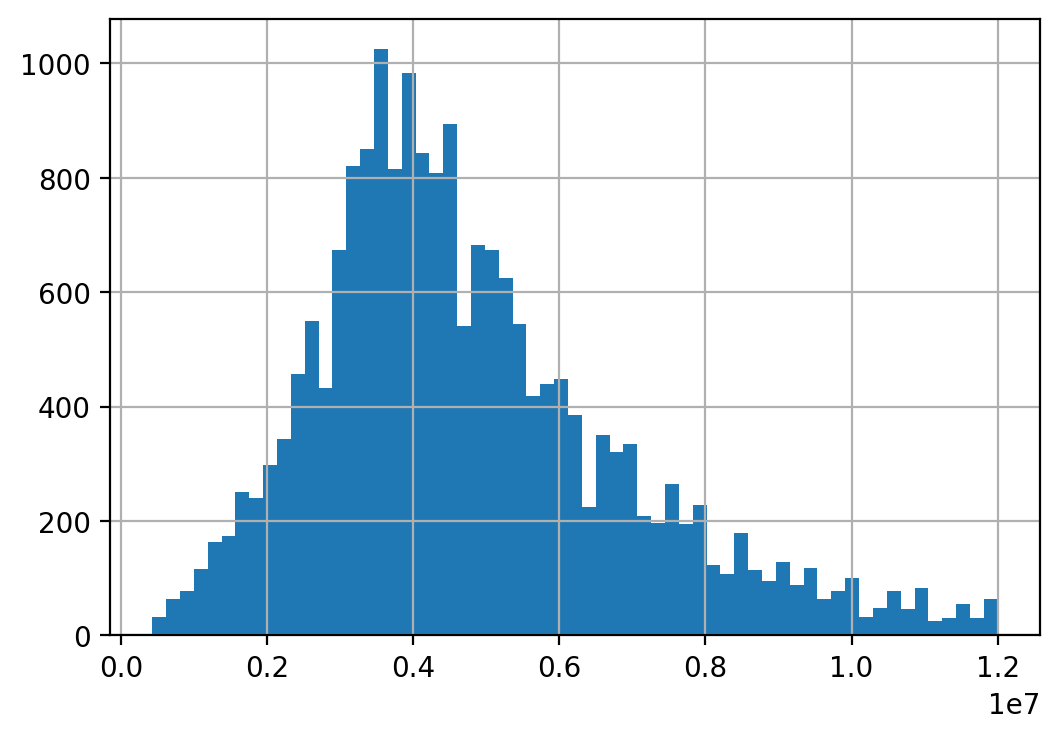

In [109]:
data['last_price'].hist(figsize=(6,4),bins='auto');

In [110]:
data['last_price'].describe()

count    1.966600e+04
mean     4.775050e+06
std      2.140093e+06
min      4.300000e+05
25%      3.300000e+06
50%      4.390000e+06
75%      5.900000e+06
max      1.200000e+07
Name: last_price, dtype: float64

Цена имеет нормальное распределение. 

Есть несколько пиковых значений (районе 3 млн. рублей и 4.5 млн. рублей), думаю это пики в зависимости от геопозиции.

Максимальная стоимость объекта 12 000 000 млн. рублей, минимальная стоимость 430 000 рублей.

Количество комнат:

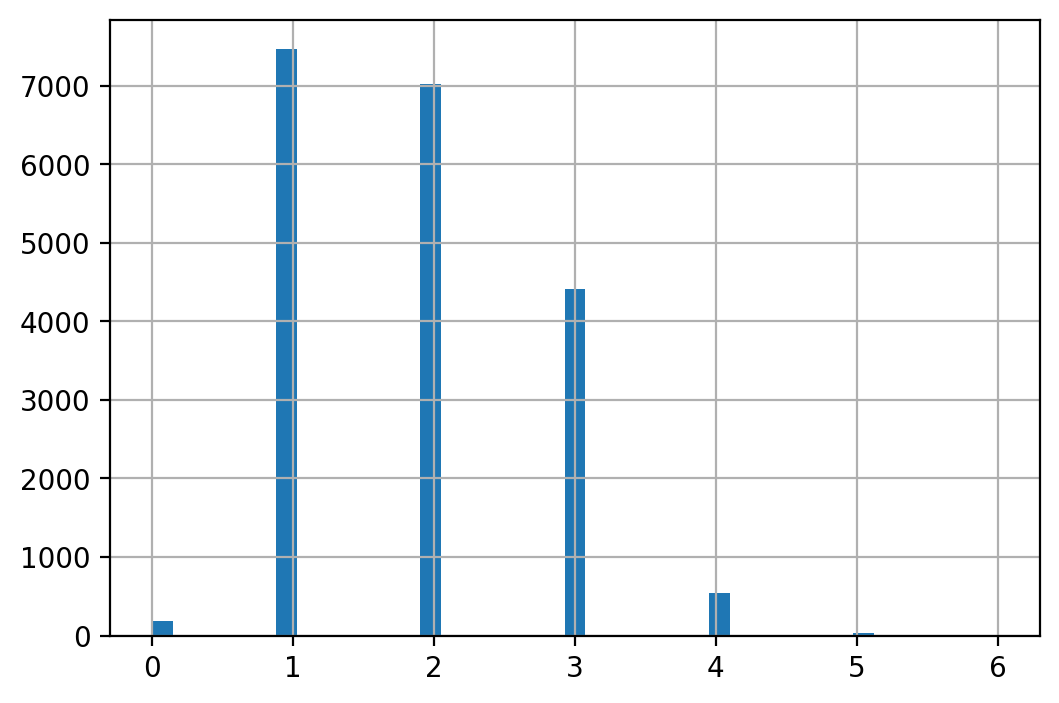

In [111]:
data['rooms'].hist(figsize=(6,4),bins='auto');

По гистограмме мы можем увидеть, что чаще всего размещают объявления по продаже 1-комнтатных квартир. Также мы можем отметить, что пристутствуют значения с 0 комнатами, можно предположить, что студии либо складксое помещение.

Высота потолков:

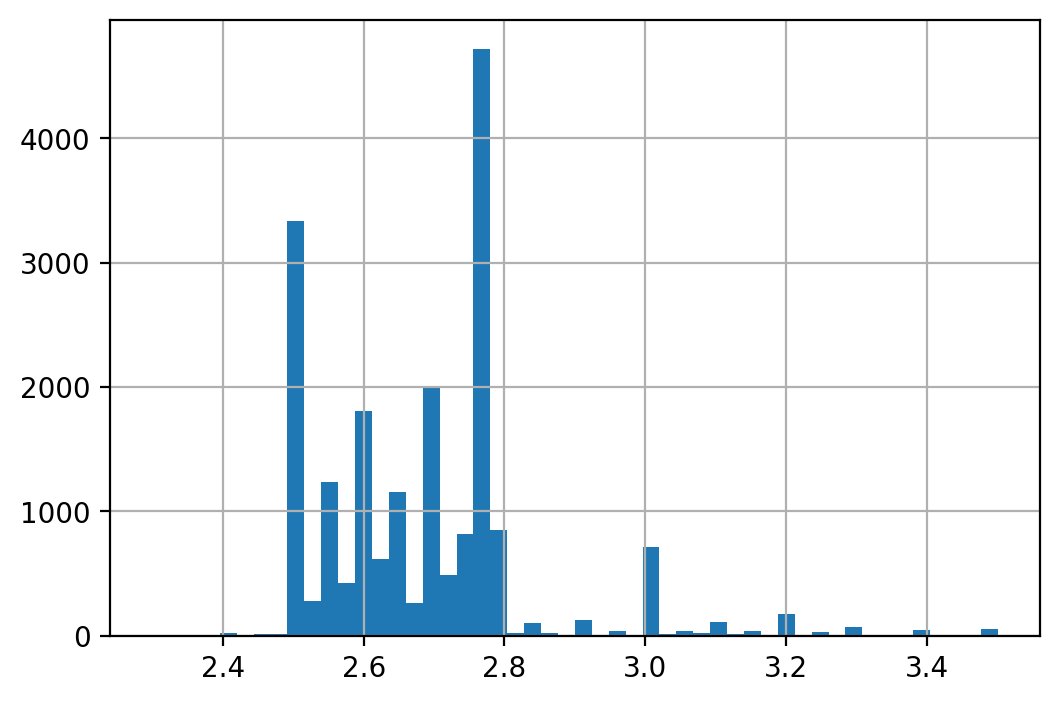

In [112]:
data['ceiling_height'].hist(figsize=(6,4),bins=50);

Можно отметить, что больше всего квартир имеют потолки высотой 2.75 метра.

Этаж квартиры:

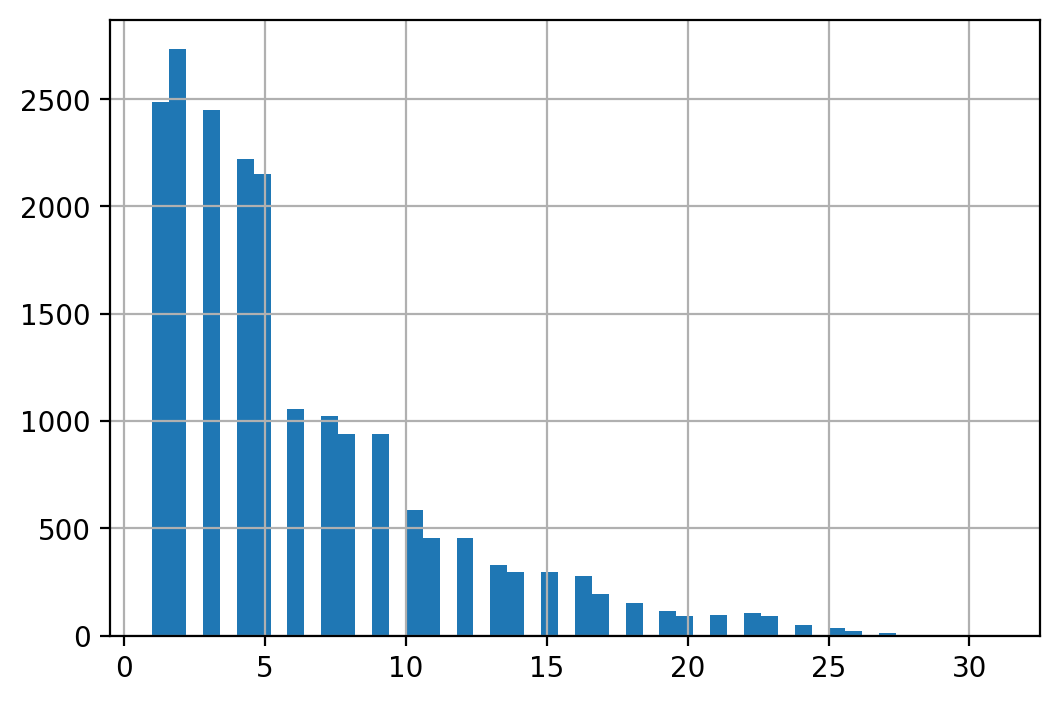

In [113]:
data['floor'].hist(figsize=(6,4),bins=50);

Больше всего квартир располагается на этажах от 1-5

Тип этажа квартиры («первый», «последний», «другой»):

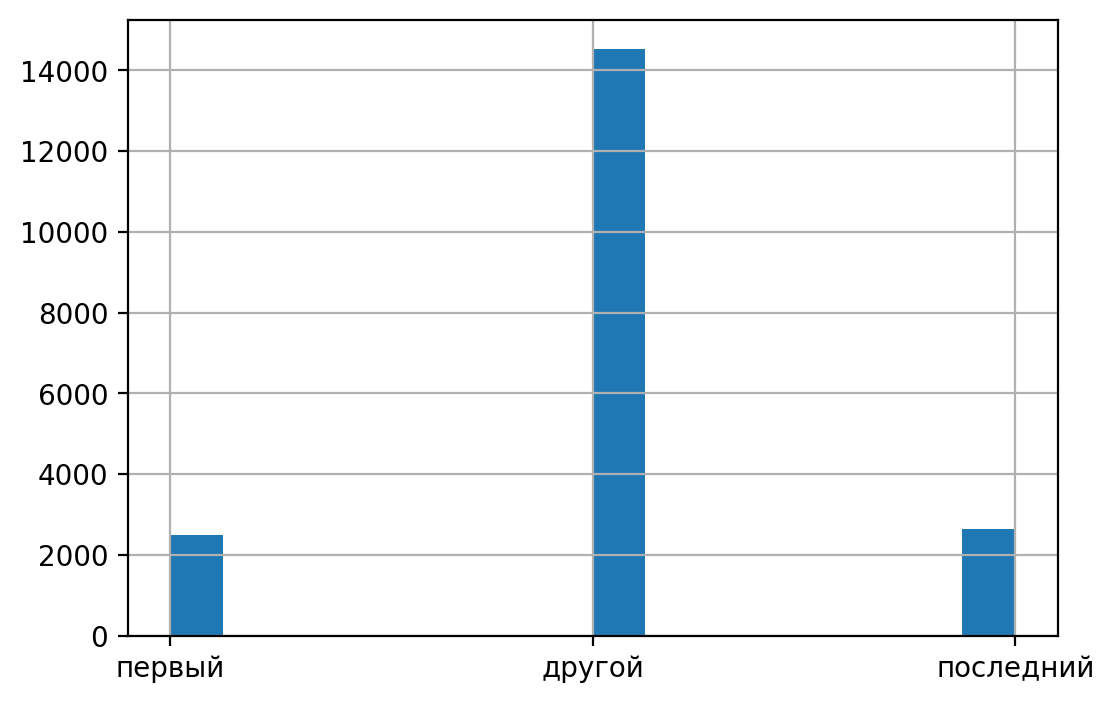

In [114]:
data['floor_type'].hist(figsize=(6,4),bins='auto');

Большинство квартир находятся не на 1 и не на последних этажах.

Общее количество этажей в доме:

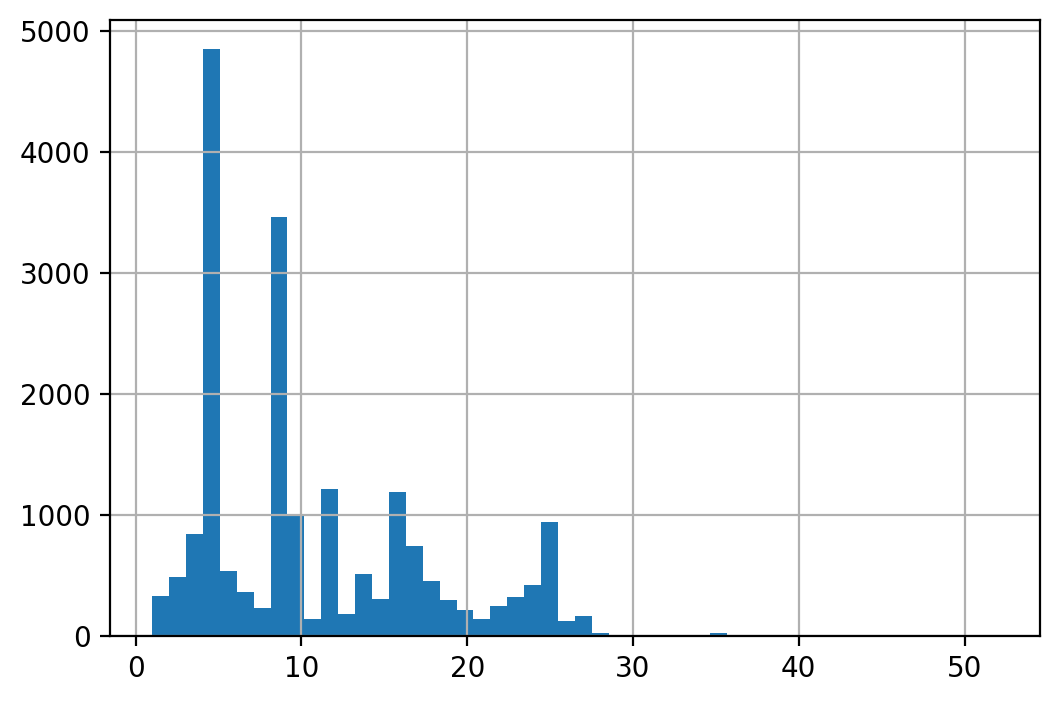

In [115]:
data['floors_total'].hist(figsize=(6,4),bins=50);

Больше всего квартир ннаходятся в домах, в которых меньше 10 этажей.

Расстояние до центра города в метрах:

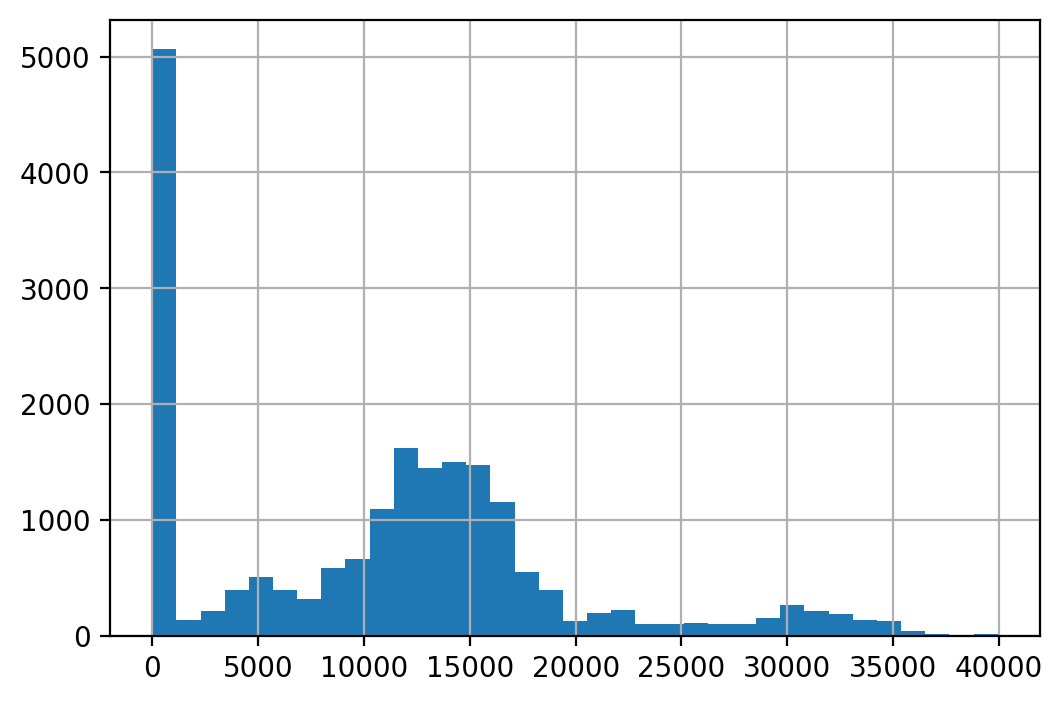

In [116]:
data['cityCenters_nearest'].hist(figsize=(6,4),bins='auto');

In [117]:
data['cityCenters_nearest'].describe()

count    19666.000000
mean     10808.080087
std       8745.818816
min          0.000000
25%          0.000000
50%      11778.000000
75%      15453.750000
max      39936.000000
Name: cityCenters_nearest, dtype: float64

Мы видим пиковые значения около 0. Скорее всего это квартиры, которые находятся в переделах центра Санкт-Петербурга.

В среднем оюъекты находятся в 10 км. от центра. Самый дальный объект находится в 40 км.

Расстояние до ближайшего аэропорта:

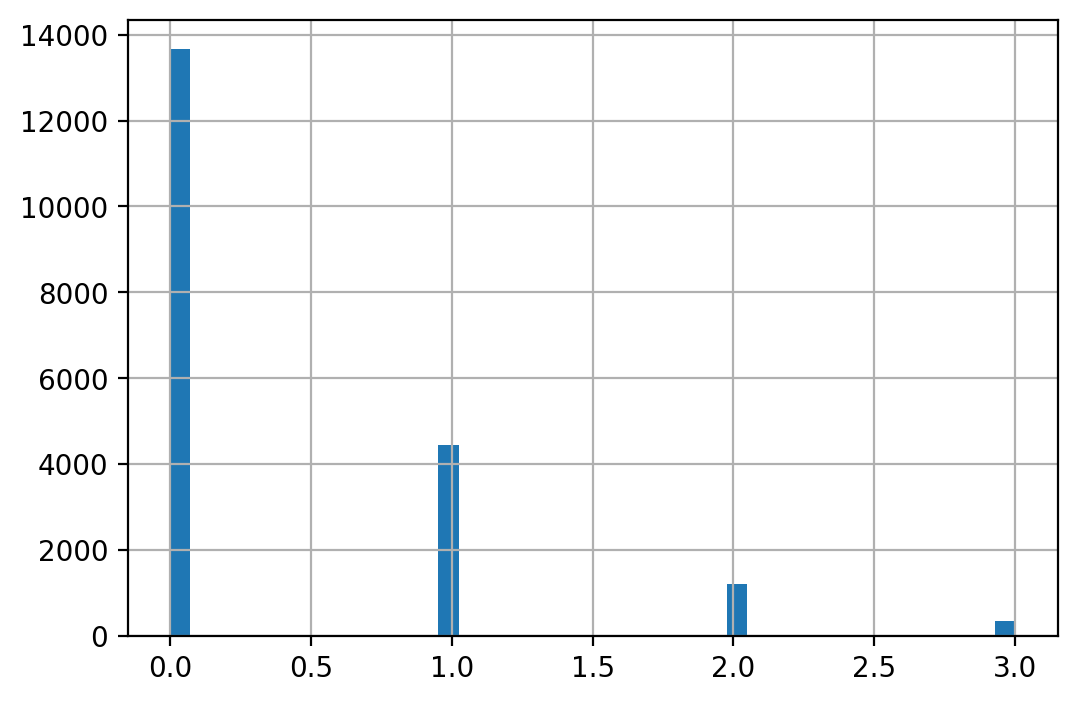

In [118]:
data['airports_nearest'].hist(figsize=(6,4),bins='auto');

Больше всего квартир ннаходятся вблизи аэропортов.

Расстояние до ближайшего парка:

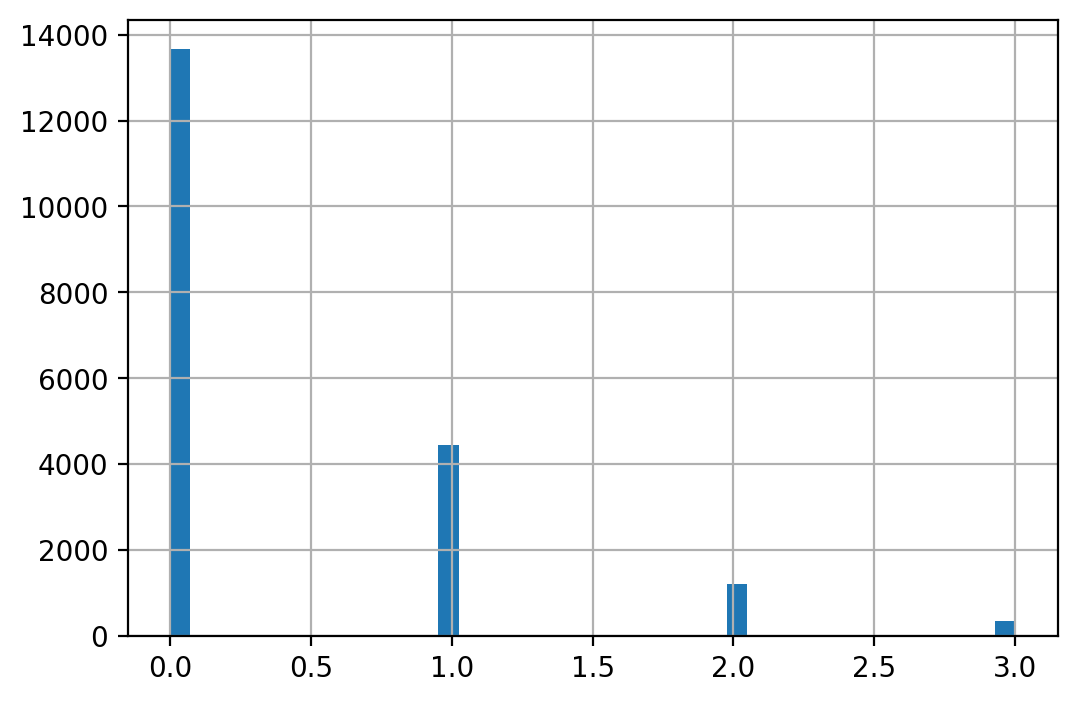

In [119]:
data['parks_nearest'].hist(figsize=(6,4),bins='auto');

Около большинства квартир нет ни одного парка :(

День и месяц публикации объявления:

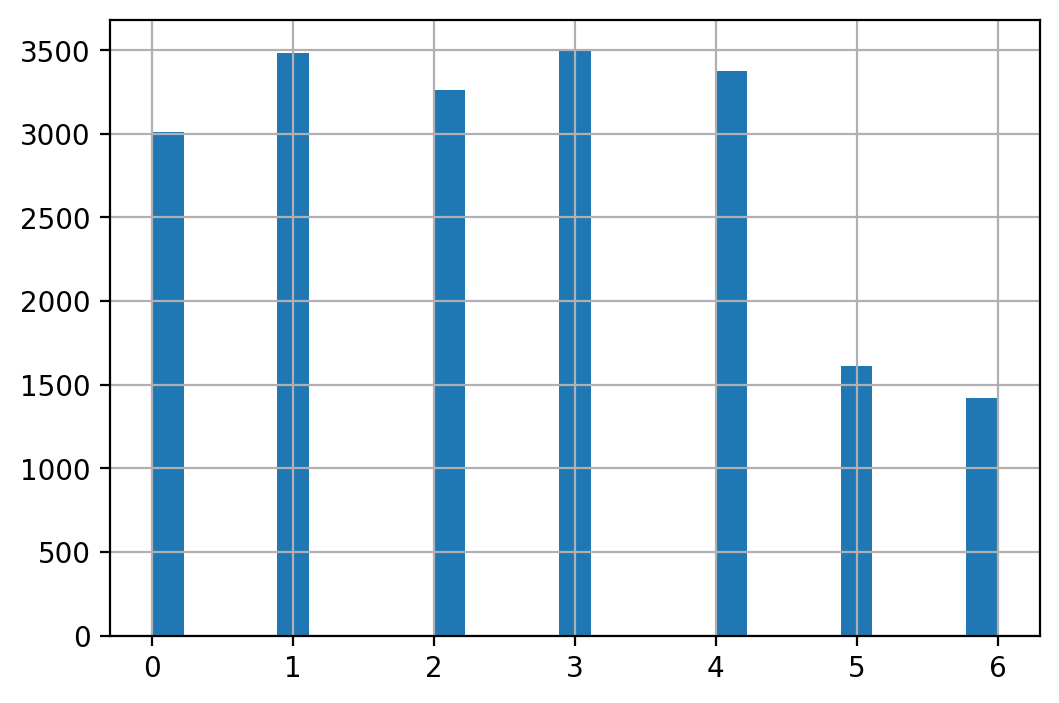

In [120]:
data['weekday'].hist(figsize=(6,4),bins='auto');

In [121]:
data['weekday'].value_counts()

3    3507
1    3480
4    3376
2    3262
0    3013
5    1610
6    1418
Name: weekday, dtype: int64

Меньше всего объявлений размещали в выходные(субботу и воскресенье)

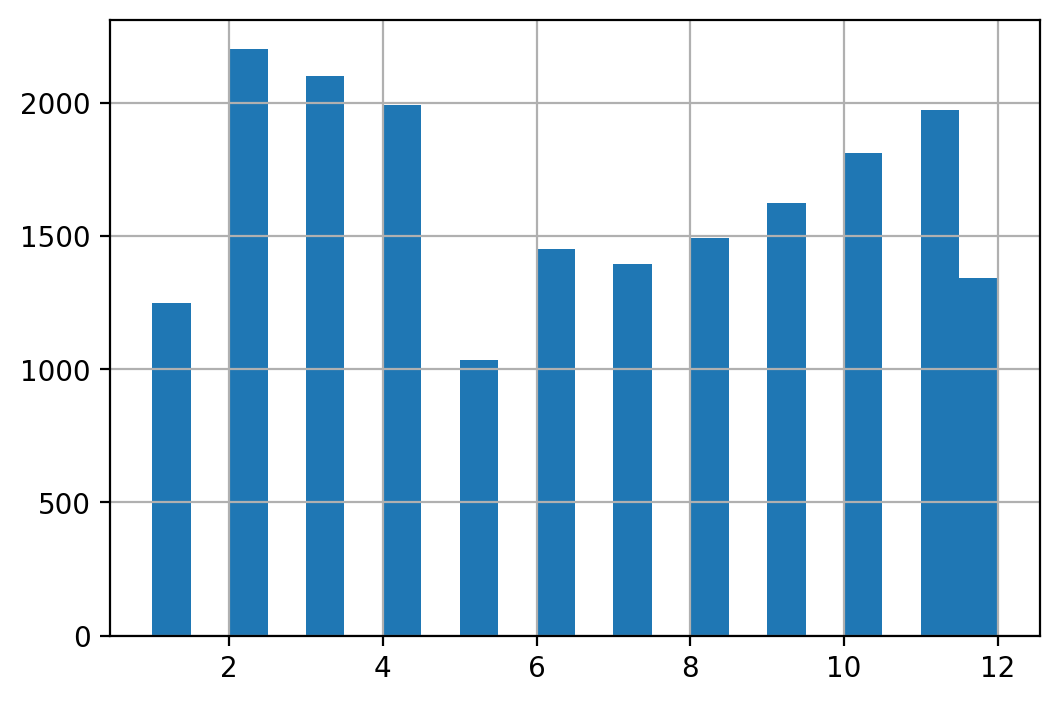

In [122]:
data['month_exposition'].hist(figsize=(6,4),bins='auto');

In [123]:
data['month_exposition'].value_counts()

2     2202
3     2102
4     1993
11    1971
10    1812
9     1622
8     1494
6     1452
7     1395
12    1341
1     1248
5     1034
Name: month_exposition, dtype: int64

Больше всего обявлений размещалось в зимние месяцы

<b>2. Изучим, как быстро продавались квартиры. </b>

Построим гистограмму и посчитаем среднее и медиану.

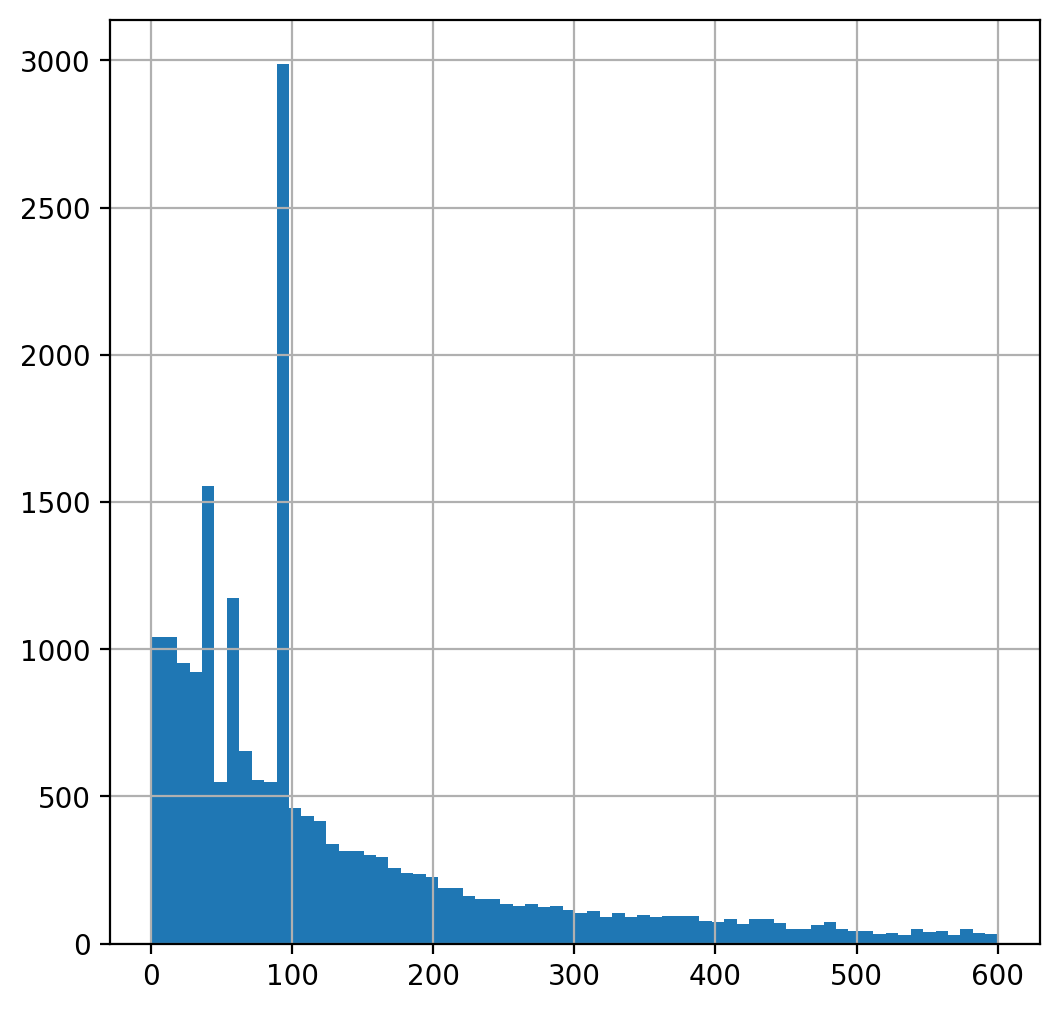

In [124]:
data['days_exposition'].hist(figsize=(6,6),bins='auto');

In [125]:
data['days_exposition'].describe()

count    19666.000000
mean       129.230296
std        125.992581
min          1.000000
25%         45.000000
50%         95.000000
75%        165.000000
max        600.000000
Name: days_exposition, dtype: float64

На гистограмме мы видим пик размещений около 100 дней. Среднее время размещения объявления находится в районе  129 дней, это около 4 месяцев, медиана же составляет около 95 дней, это около 3 месяцев.Максиальное значение составляет около 600 дней (после удаления выбросов), что составляет почти 1,5 года.  По гистограмме и полученной информации можно сделать вывод, что быстрыми считаются продажи в первые 3-4 месяца, долгими считаются продажи, когда объявление было размещено более 200 дней назад.

<b>2. Изучим, какие факторы больше всего влияют на общую (полную) стоимость объекта. </b>

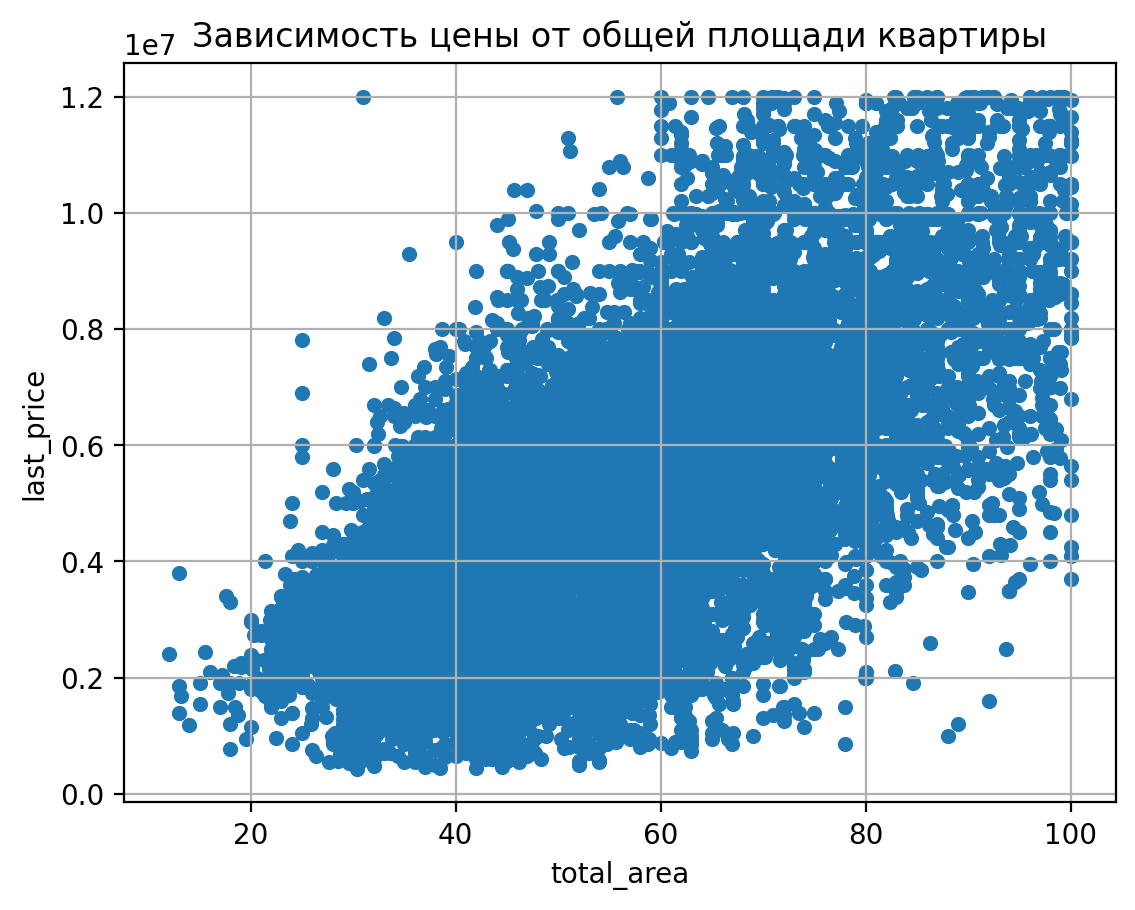

In [126]:
data.plot(y='last_price',x='total_area',kind='scatter',grid=True,title='Зависимость цены от общей площади квартиры');

In [127]:
data['last_price'].corr(data['total_area']) # Рассчитаем коэффициент корреляции.

0.6831125782846884

Коэффициент корреляции Пирсона — положительный и стремится к 1, что говорит о тесной линейной взаимосвязи.

По данному графику мы можем сказать о прямой зависимости стоимости квартиры от ее площади, чем больше площадь, тем больше стоимость квартиры.

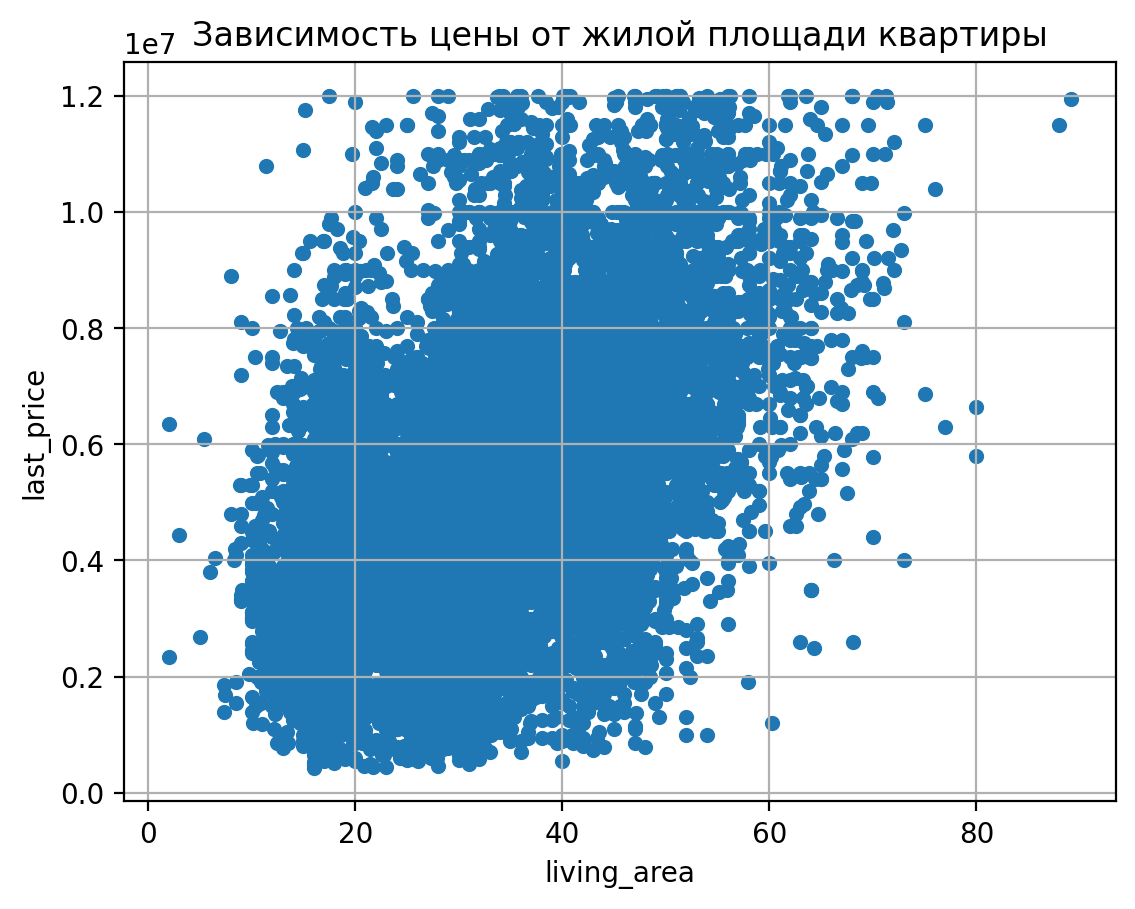

In [128]:
data.plot(y='last_price',x='living_area',kind='scatter',grid=True,title='Зависимость цены от жилой площади квартиры');

In [129]:
data['last_price'].corr(data['living_area']) # Рассчитаем коэффициент корреляции.

0.5485340232767307

Коэффициент корреляции — положительный, больше 0.5 , что говорит о наличии, однако не слишком тесной линейной взаимосвязи.

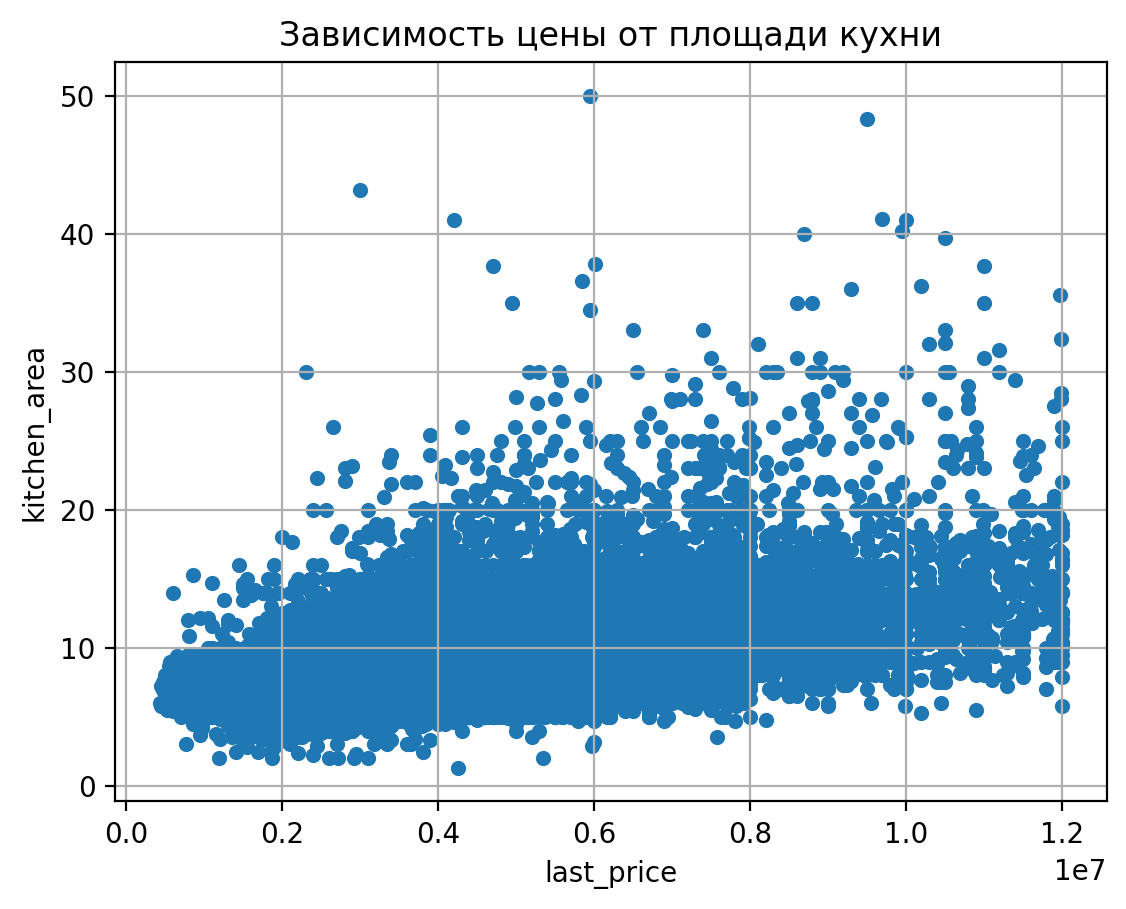

In [130]:
data.plot(y='kitchen_area',x='last_price',kind='scatter',grid=True,title='Зависимость цены от площади кухни');

In [131]:
data['last_price'].corr(data['kitchen_area']) # Рассчитаем коэффициент корреляции.

0.4887808677994107

Коэффициент корреляции — положительный,но меньше 0.5 , что говорит о наличии связи, однако не слишком сильной. 

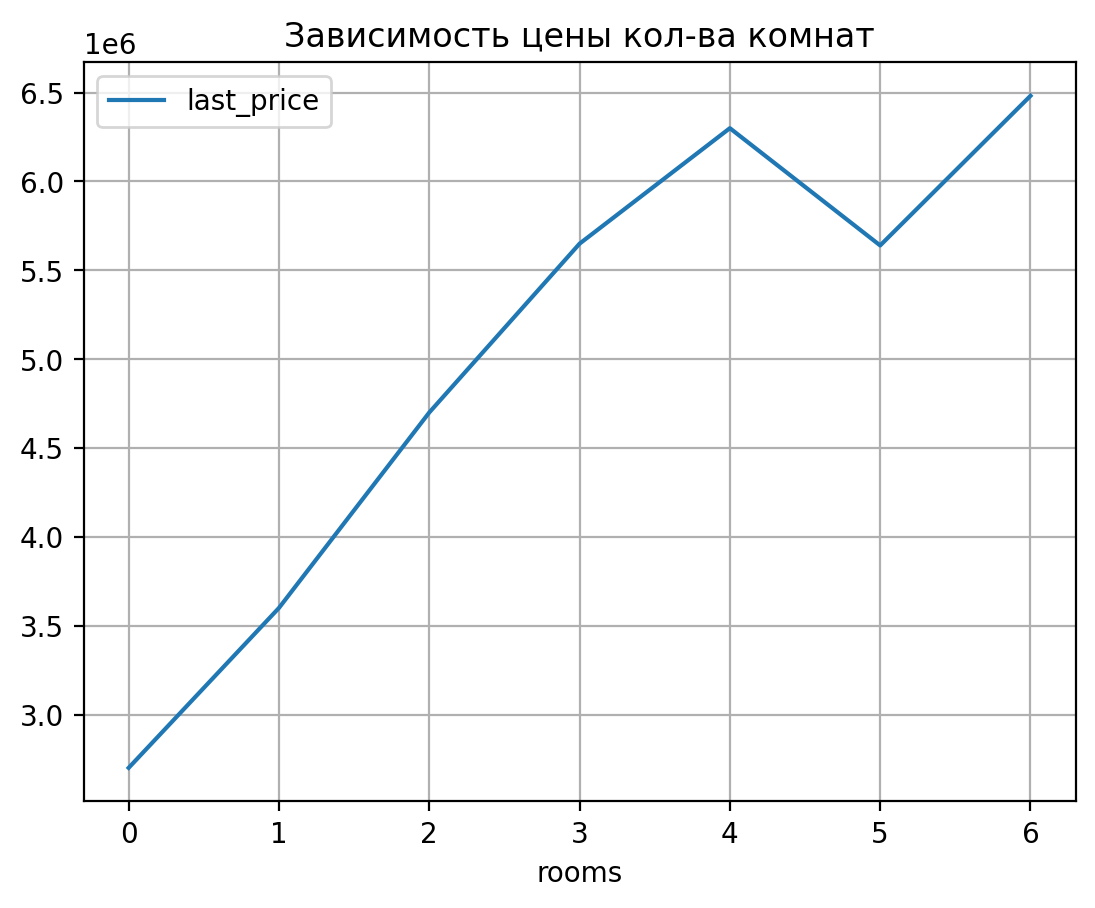

In [132]:
# Построим зависимость стоимости от кол-ва комнат. Возьмем медианную стоимость по комнатам в квартирах.
data.pivot_table(index='rooms',values='last_price',aggfunc='median').plot(grid=True,title='Зависимость цены кол-ва комнат');

По графику мы видим увеличение стоимости от количеств квартир. Чем больше комнат, тем выше стоимость. Ранее мы установили взаимосвязь стоимости от плозади квартиры, здесь же мы можем предположить, что чем больше комнат в квартире, тем больше площадь и, соответственно, выше стоимость.

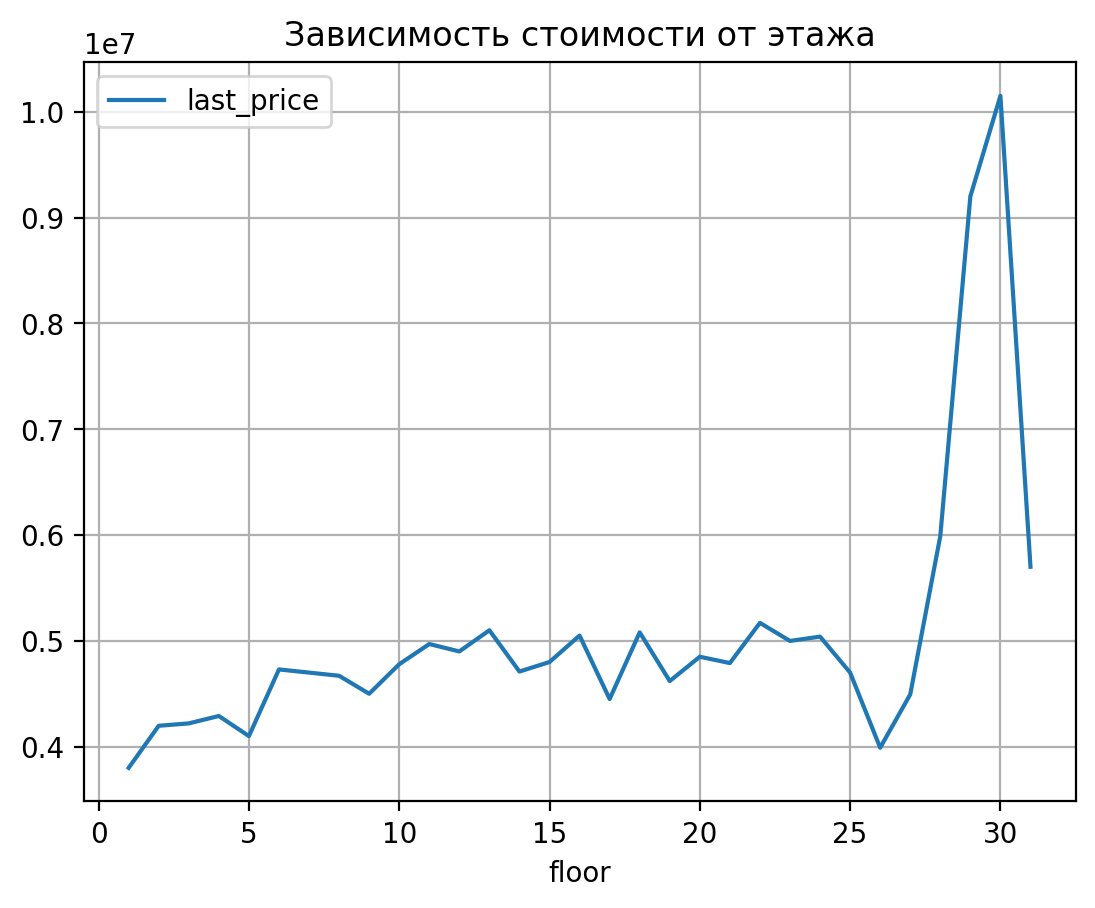

In [133]:
data.pivot_table(index='floor',values='last_price',aggfunc='median').plot(grid=True,title='Зависимость стоимости от этажа');

По графику мы можем отметить, что квариры расположенные на высоких этажах стоят намного дороже. Можем предположить, что такая высокая стоимость может быть на пентхаус, которые, обычно, занимают большую площадь и соответственно, большую стоимость.

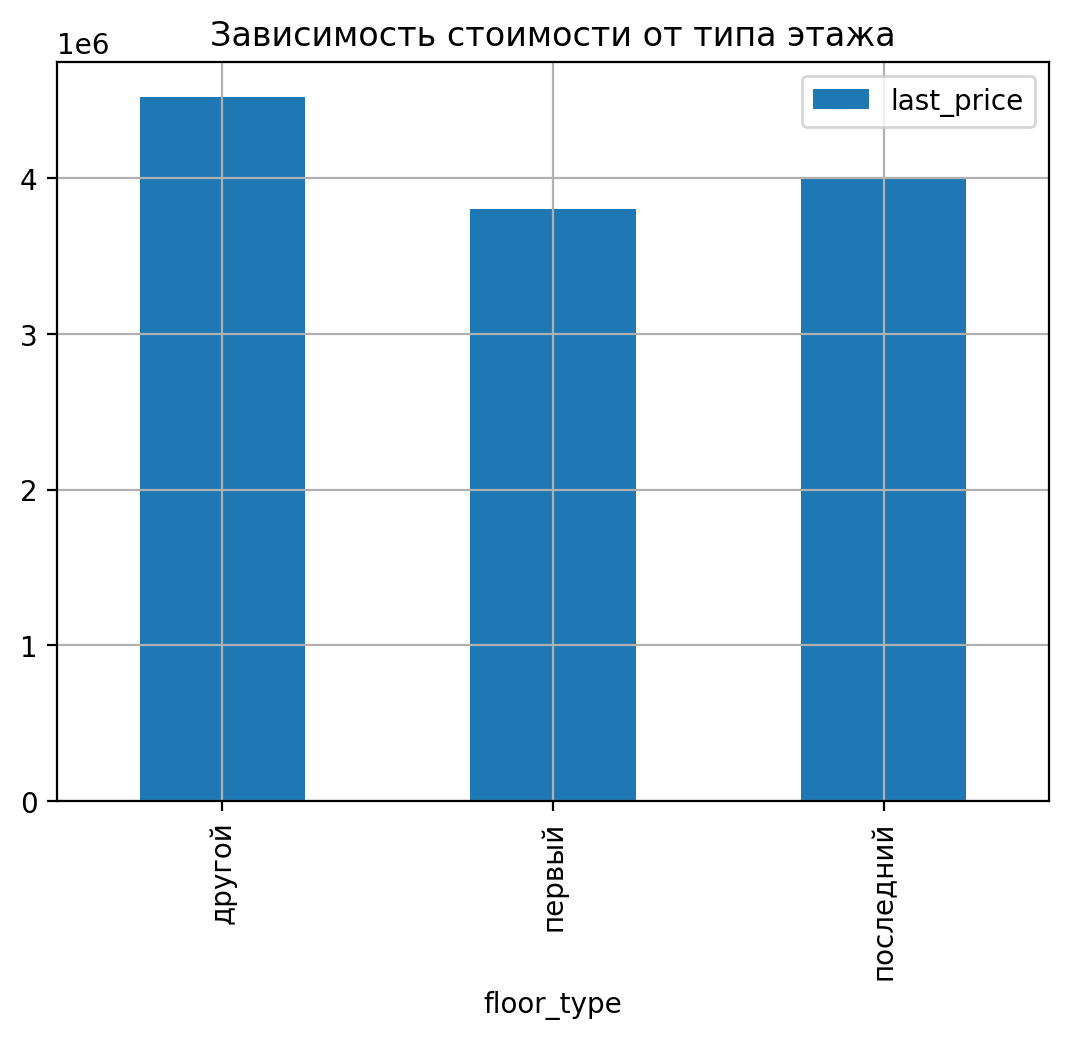

In [134]:
data.pivot_table(index='floor_type',values='last_price',aggfunc='median').plot(kind='bar',grid=True,title='Зависимость стоимости от типа этажа');

По графику мы можем сказать, что в среднем, квартиры, расположенные на первом этаже стоят дешевле, чем остальные.

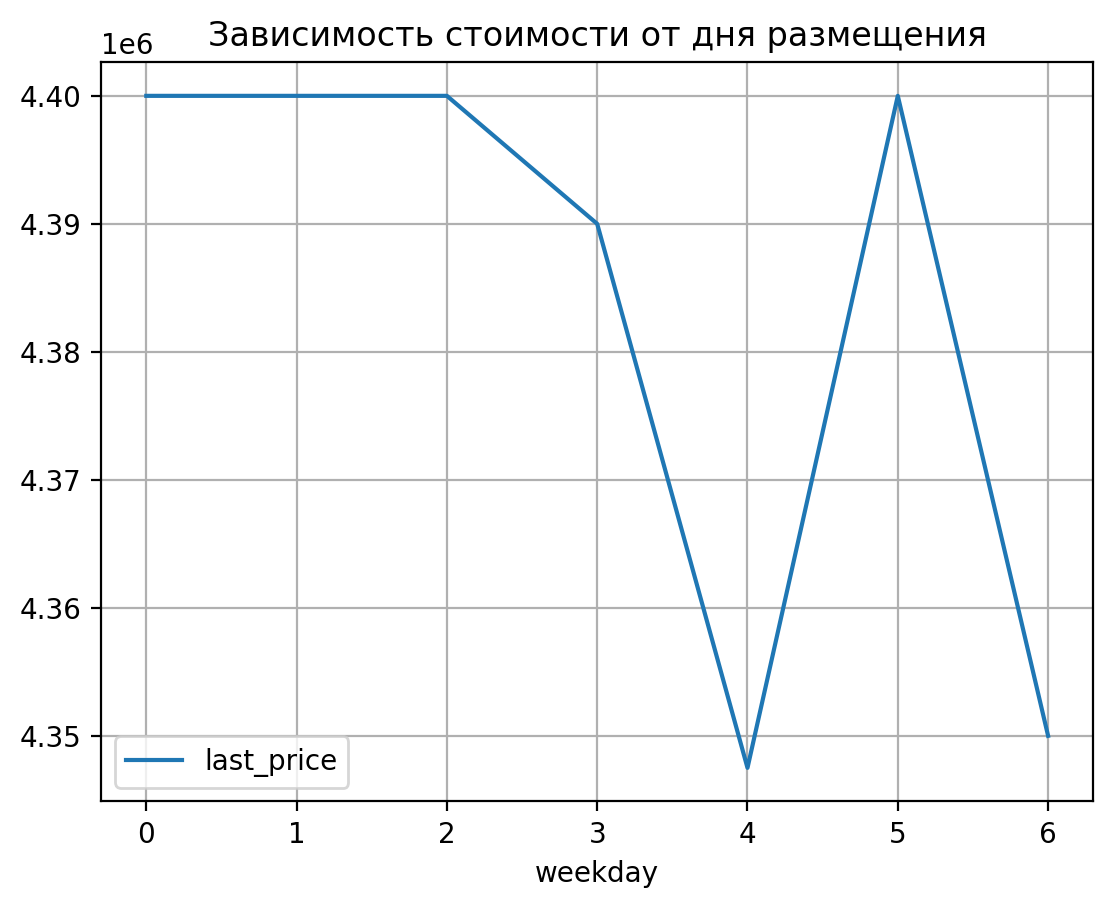

In [135]:
data.pivot_table(index='weekday',values='last_price',aggfunc='median').plot(grid=True,title='Зависимость стоимости от дня размещения');

В среднем, самые высокие по стоимости квартиры размещались в первую половину недели.

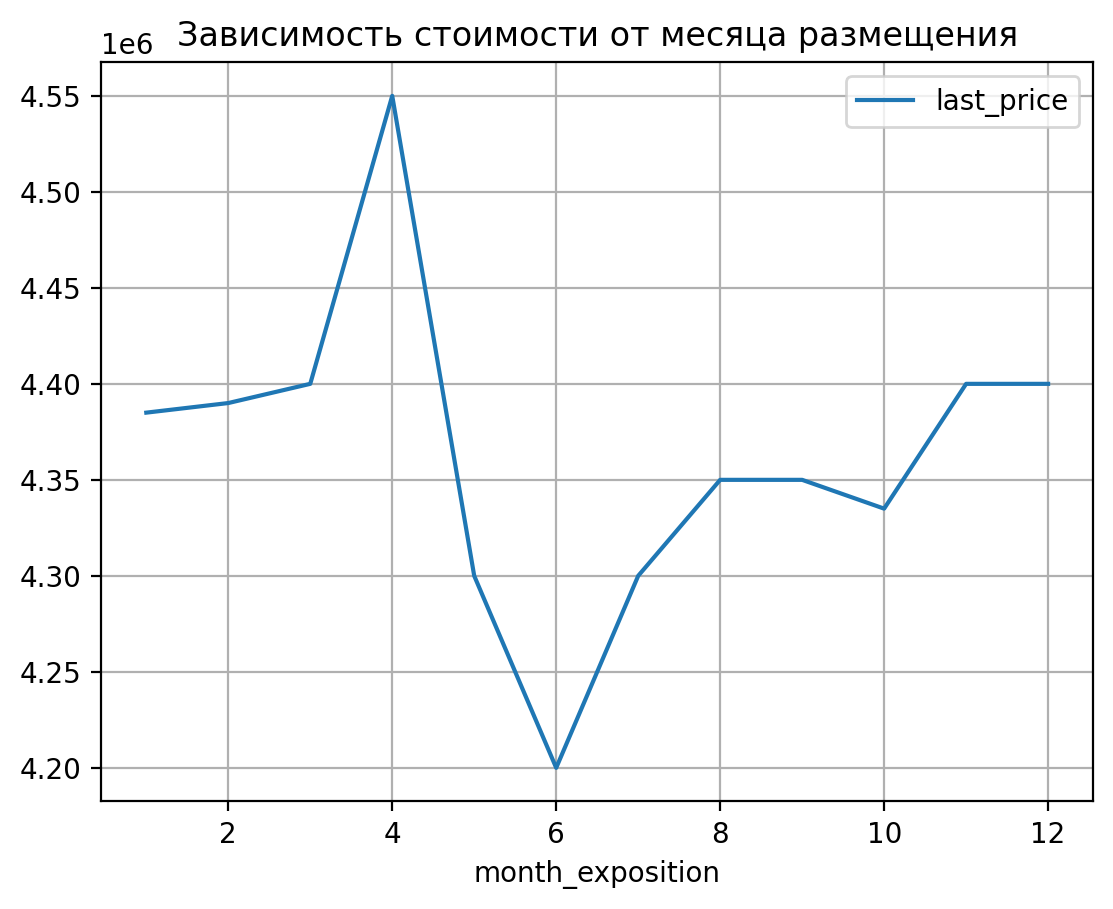

In [136]:
data.pivot_table(index='month_exposition',values='last_price',aggfunc='median').plot(grid=True,title='Зависимость стоимости от месяца размещения');

Объявления с высокой стоимостью квартир размещались чаще всего в апреле.

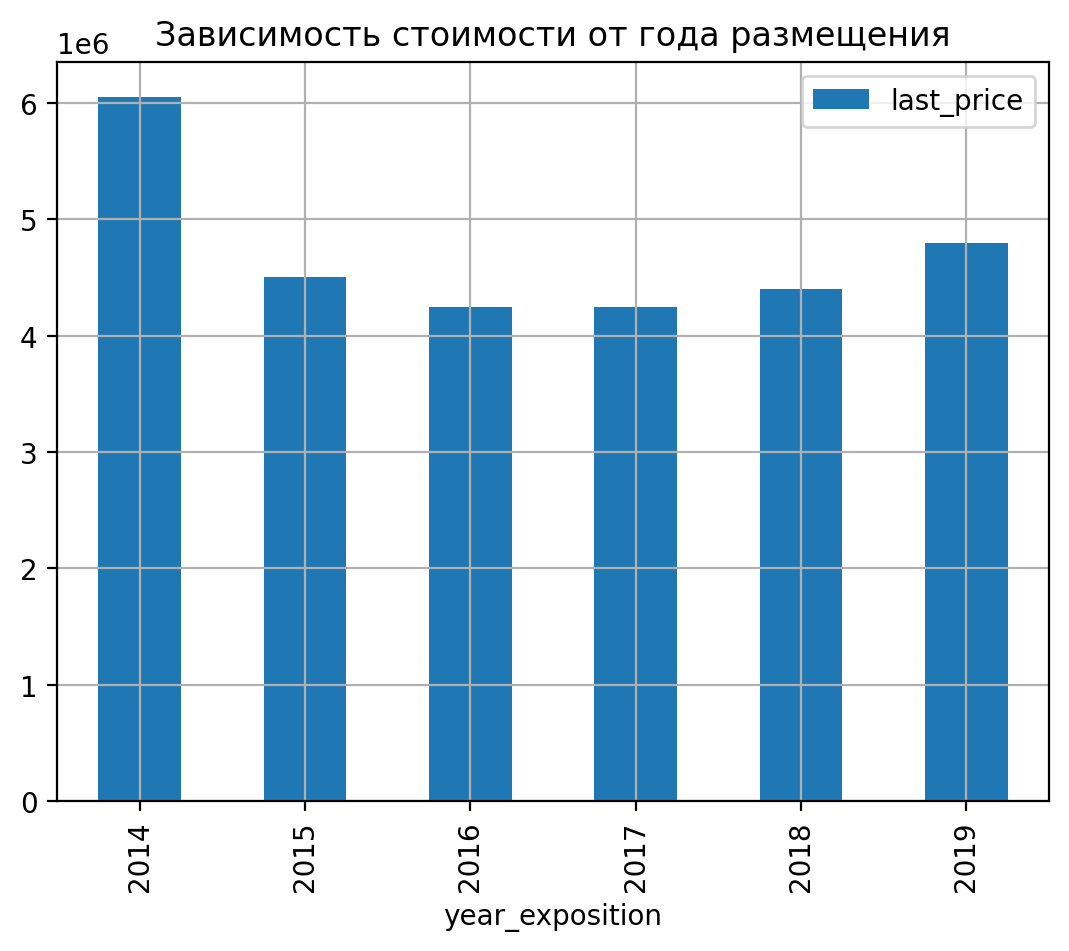

In [137]:
data.pivot_table(index='year_exposition',values='last_price',aggfunc='median').plot(kind='bar',grid=True,title='Зависимость стоимости от года размещения');

Самые высокие по стоимости квартиры были размещены в 2014 году.

<b>3. Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. </b>

Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

In [138]:
city=data.pivot_table(index='locality_name',values='price_m',aggfunc=['mean'])
price= data.pivot_table(index='locality_name',values='price_m',aggfunc=['count'])
city['price_count']=price['count']
city.sort_values('price_count',ascending=False).head(10)

,mean,price_count
,price_m,
locality_name,,
Санкт-Петербург,106088.510742,12684
Мурино,86193.897997,565
Кудрово,95359.751790,442
Шушары,78565.272481,416
Всеволожск,67115.035622,368
Колпино,75193.946438,323
Парголово,90332.866841,315
Пушкин,100209.341882,313


По полученным данным мы можем сказать, что больше всего объявлений размещены по продаже квартир в Санкт-Петербурге, средняя стоимость одного квадратного метра составляет= 106 063 рублей. Самая меньшая стоимость одного квадратного метра находится в Выборге и составляяет 58 149 рублей.

<b>4. Опишем как стоимость объектов зависит от расстояния до центра города. </b>

Опишем, как стоимость объектов зависит от расстояния до центра города.

In [139]:
is_spb=data.query('locality_name == "Санкт-Петербург"') # Отсортируем квартиры по локации
price_spb=is_spb.pivot_table(index='distance_in_km',values='last_price',aggfunc=['mean']) #Посмотрим зависимость цены от расстояния до центра
price_spb

,mean
,last_price
distance_in_km,
0,6.609060e+06
1,8.021107e+06
2,7.766417e+06
3,7.111805e+06
4,7.321837e+06
5,7.347114e+06
6,6.983406e+06
7,6.654736e+06


По данной таблице, мы можем сделать вывод о том, что чем дальше находится квартира от центра, тем она дешевле.

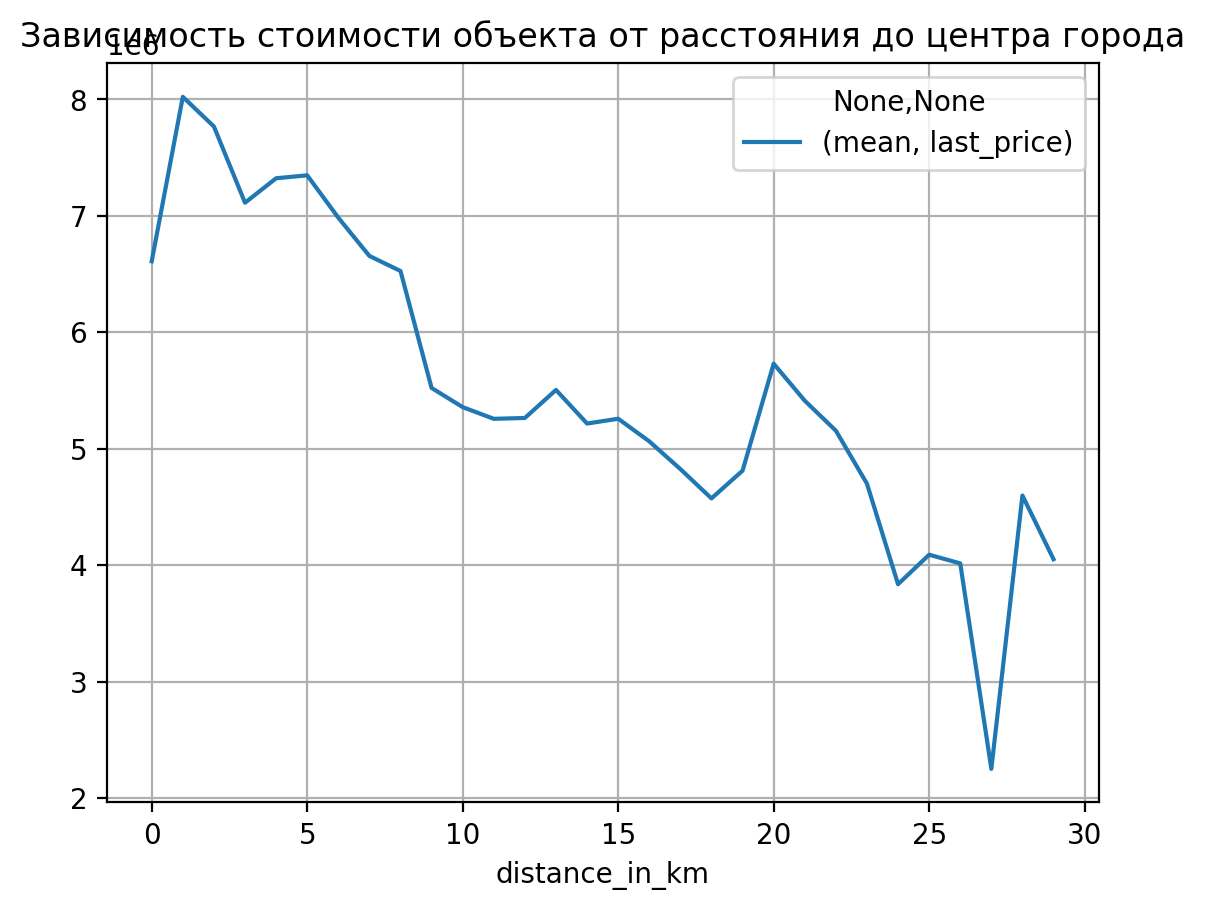

In [140]:
price_spb.plot(grid=True,title='Зависимость стоимости объекта от расстояния до центра города');

По графику мы также можем видеть, что чем дальше находится квартира, тем она дешевле.

### Общий вывод

Для анализа нам были даны данные сервиса Яндекс Недвижимость — архив объявлений за несколько лет о продаже квартир в Санкт-Петербурге и соседних населённых пунктах.

Основной задачей было выполнить предобработку данных и изучить их, чтобы найти интересные особенности и зависимости, которые существуют на рынке недвижимости.

<b>1. Этап изучения общей информации. </b>

Мы открыли файл, в нем имелось 23699 записей. После изучения основой информации мы выявили, что в данных имеются пропуски, которые нам предстоит заполнить. Также после построения гистограмм отметили, что некоторые данные имеют ненормальное распределение, что означает, что присутствуют выбросы.Далее в предобработке данных мы их устраним.

<b>2. Предобработка данных. </b>

1. Начнем предобработку данных с нахождения пропусков в столбцах и заменой их.

- В столбце `ceiling_height` помимо пропусков мы обнаружили аномально высокие значения. Предположим, что в этих значениях неверное количество знаков после запятой. Чтобы привести эти значения к нормальным значениям мы использовали функцию apply, которая выявит аномальные значения (выше 11 метров) и делит на 10, тем самым сдвинет кол-во знаков влево. 

  Затем в этом же столбце, пропуски мы заменили среднее значение по каждому городу.
  
  
- В столбцах ` living_area` и `kithen_area` для замены пропусков мы нашли коффициент отношения площадей (жилой/кухонной площади к общей площади), взяли среднее значениее этих коэффициентов и умножили общую площадь на эти коэффициенты. Полученными значениями заполнили пропуски.

- В столбце `days_exposition` заменили пропуски на медианное значение по столбцу.


- Во всех остальных столбцах мы заменил пропуски либо на '0' либо на пустые значения, т.к. среднии значения или медиана не подойдут для замены. 

- Пропуски в столбце `floors_total` составили всего 86 строк, мы их удалили.

Пропуски в данных могут быть обусловлены разными причинами, так как в базе содержится информация, добавленная пользователем, и картографические данные. Например, пропуски в данных о площади квартиры и кухни, этаж и кол-во балконов могут быть обусловлены случайной ошибкой (человеческим фактором).Другие же данные могут, такие как расстояния до центра города, аэропорта и ближайшего парка, а также кол-во парков и прудов рядом и дней размещения на сайте, могут быть обусловлены технической ошибкой, либо недостатком данных.


2. Далее мы рассмотрели типы данных в каждом столбце.

Тип данных в столбцах:
- `balcony`
-`parks_around3000`
-`parks_nearest`
-`airports_nearest`
-`days_exposition`
-`ponds_around3000`
-`living_area`
-`kitchen_area`
-`floors_total` изменим на числовой, т.к. тип 'object' не подходит для числовых значений в столбцах. 

Данные в столбце `is_apartment` переведем в булевое значение. Формат в столбце`first_day_exposition` изменим на 'str', в дальнейшем потребуется для вычислений.

3. Далее мы изучили уникальные значения в столбце `locality_name`.

В столбце мы выявили неявные дубликаты и для того, чтобы из заменить мы создали функцию, которая проходится по столбцу и находит триггерные слова в дубликатах и удаляет их. Мы применили фукнцию к столбцу и избавились от дубликатов. 

4. Нашли и устранили редкие и выбивающиеся значения.

- В столбце `last_price` мы заметили аномально высокую стоимость квартир(около 763 млн.рублей). Для чистоты данных мы удалили выбросы в которых стоимость квартир была выше 12 000 000 рублей.

- В столбце `ceiling_height` мы нашли выбросы в значениях около 10 метров. Мы построили boxplot и выявили, что границей является 3,5 метра, выбросы составили меньше 2%, поэтому мы их удалили.

- В столбце `days_exposition` были объявления, которые были размещены на сайте более 2х лет. Мы удалили эти значения. 

- В столбце `total_area` мы нашли квартиры площадью более 200 кв.м. Мы убрали квартиры с площадью менее 100 кв.м., так как процент выбросов составил меньше 3%.

- В столбце `cityCenters_nearest` мы заметили небольшие выбросы больших значений. Кол-во выбросов составило 2%, было решено их удалить.


Некоторые данные имеют выбросы, которые могут быть связаны либо с техническими ошибками (неверный формат или ошибка при вырузке данных), либо человеческий фактор (некорректное заполнение полей).

<b>3. Добавление новых столбцов в таблицу. </b>

В таблицу мы добавили новые столбцы:
- Цена одного квадратного метра `price_m`
- День недели публикации объявления `weekday`
- Месяц публикации объявления `month_exposition`
- Год публикации объявления `year_exposition`
- Тип этажа квартиры `floor_type`
- Расстояние до центра города в километрах `distance_in_km`

<b>4.Проведение исследовательского анализа данных. </b>

1. Изучили основные параметры объектов и сделали следующие выводы:

- Больше всего квартир общей площадью около 50 кв.метров. Минимальное значение жилой площаи 12 кв.м., максимальное значение 100 кв.м. 
- Средние значения находятся в районе около 18кв.м и около 28 кв.м.Максимальное значение 89 кв.м., миниальное 2 кв.м.
- Площадь кухонь в среднем составляет от 5-10 кв.метров. Максимальное значение 50 кв.м., минимальное значение 1.3 кв.м.
- Стоимость квартир может зависеть от геопозиции объекта.Есть несколько пиковых значений (районе 3 млн. рублей и 4.5 млн. рублей).
  Максимальная стоимость объекта 12 000 000 млн. рублей, минимальная стоимость 430 000 рублей.
- Чаще всего размещают объявления по продаже 1-комнатных квартир.
- Больше всего квартир имеют потолки высотой 2.75 метра.
- Больше всего квартир располагается на этажах от 1-5.
- Большинство квартир находятся не на 1 и не на последних этажах.
- Больше всего квартир ннаходятся в домах, в которых меньше 10 этажей.
- Много объявлений размещено по продаже квартир, которые находятся в переделах центра Санкт-Петербурга.
- Больше всего квартир находятся вблизи аэропортов.
- Около большинства квартир нет ни одного парка.
- Меньше всего объявлений размещали в выходные(субботу и воскресенье).
- Больше всего обявлений размещалось в зимние месяцы.


2. Изучили, как быстро продавались квартиры.

- Среднее время размещения объявления находится в районе 129 дней, это около 4 месяцев, медиана же составляет около 95 дней, это около 3 месяцев.Максиальное значение составляет около 600 дней (после удаления выбросов), что составляет почти 1,5 года. По гистограмме и полученной информации можно сделать вывод, что быстрыми считаются продажи в первые 3-4 месяца, долгими считаются продажи, когда объявление было размещено более 200 дней назад.

3. Изучили, какие факторы больше всего влияют на общую (полную) стоимость объекта.

- Мы выявили прямую зависимость стоимости квартир от общей площади. Меньшую зависимость стоимость имеет от жилой и кухонной площадей. 
- Также выявили ,что чем больше комнат в квартире, тем выше стоимость. Так как чем больше комнат в квартире, тем больше площадь и соответственно выше стоимость.
- Самую высокую стоимость имеют квартиры, расположенные на самых высоких этажах.Можем предположить, что такая высокая стоимость может быть на пентхаус, которые, обычно, занимают большую площадь и соответственно, большую стоимость. Квартиры, расположенные на первых этажах стоят дешевле. 
- Самые высокие по стоимости квартиры размещались в первой половине недели, в апреле и в 2014 году.

4. Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.

- После исследования мы сделали вывод, что больше всего объявлений размещены по продаже квартир в Санкт-Петербурге, средняя стоимость одного квадратного метра составляет= 106 063 рублей. Самая меньшая стоимость одного квадратного метра находится в Выборге и составляяет 58 149 рублей.

5. Описали, как стоимость объектов зависит от расстояния до центра города.
- По полученных данным, можно сделать вывод, чем дальше находится квартира от центра, тем она дешевле.

<b>Рекомендации: </b>

- Стоит проанализировать выбросы.Например, слишком дорогие квартиры. Сделать отдельный датасет с дорогими квартирами, как данные об элитной недвижимости, и провести отдельный анализ, понять, какие параметры относят недвижимость к элитной и как быстро она продается.
- Для получения более полного анализа, можно обработать и проанализировать другие признаки, такие как зависимость стоимости от местоположения квартиры к различным объектам (аэропорты, парки и водоемы).
- Проанализировать, как влияет наличие фотографий на скорость продажи квартиры. 
- Какие планировки квартир продаются чаще, студии или обычные.